<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p3/blob/milestone3code/notebooks/group_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1 Project

## Business Case

### Authors

Jon Rasiko, Joel Ruetas, Samiha Simran, Amina Robi

### Abstract

Text classification is the process of assigning text documents into two or more categories. The most common form is binary classification or assigning one of two categories to all documents in the corpus. This project uses binary classification to assign websites as either benign or malicious.


### Background

Phishing is defined as “the practice of tricking Internet users (as through the use of deceptive email messages or websites) into revealing personal or confidential information which can then be used illicitly” (Definition of phishing, 2023). According to (Rosenthal, 2022), “96% of phishing attacks arrive by email. Another 3% are carried out through malicious websites and just 1% via phone”. The frequency and costs associated phishing and ransomware attacks have increased year after year:

* In 2020, 6.95 million new phishing and scam pages were created, with the highest number of new phishing and scam sites in one month of 206,310. The average ransom paid increased 171% from 2019 to 2020 (\$115,123 to \$312,493), said the 2021 Unit 42 Ransomware Threat Report.
* By September 2020, the average ransom payment peaked at $233,817, according to the 2021 Webroot BrightCloud Threat Report. The report also found that phishing spiked by 510 % from January to February 2020 alone.
* According to the Sift Q1 2021 Trust & Safety Index, in 2020 the pandemic increased online giving by 20.7%. This increase in traffic provided cover to fraudsters that hid behind transaction surges:
    * Ransomware attacks grew by over 40%.
    * Email malware attacks were up by 600% compared to 2019. 

Improving the detection and reporting of phishing emails/URLs is a critical requirement to reduce the success rate of social engineering attacks, which are the number 1 cause of compromise on corporate networks. Reducing the success rate of social engineering attacks also reduces any potential impact of costs associated with ransomware attacks and the legal and reputation costs associated with the disclosure of private data.

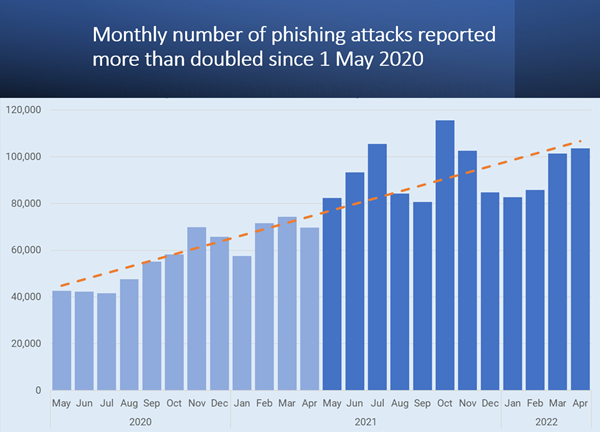

### Objective

The objective is to use text classification models to determine if
websites are benign or malicious. This will allow us to improve detection and reporting of phishing websites, so we are in better position reduce the
rate of social engineering attacks and leakage of private
data.

## Requirements

Before proceeding, you will be required to install some Python modules. The notebook requires the modules below, which can be installed by executing the code block below.

* `pycaret`
* `nltk`

In [ ]:
%%capture
!pip install --upgrade pip
!pip install pycaret nltk

# Download the required NLTK documents
import nltk

nltk.download('stopwords')
nltk.download('punkt')

## Overall Process

Here are the general steps to classify a large number of webpages using pycaret:

1. **Collect and preprocess the data**: Collect the webpages that need to be classified and preprocess them to extract the relevant information. This may involve cleaning the text data, removing stop words, and transforming the data into a format that can be used by `pycaret.
1. **Load the data into a pandas `DataFrame`**: Load the preprocessed data into a pandas `DataFrame`.
1. **Generate the `CountVectorizer`**: Generate the token count vector to append to other features. This involves filtering some of the rows in the `DataFrame`.
1. **Set up the `PyCaret` environment**: Initialize the `pycaret` environment and load the data using the `setup()` function. This function automatically preprocesses the data and prepares it for modeling.
1. **Train and compare multiple models**: Train multiple classification models using the `compare_models()` function. This function automatically trains and evaluates several models and selects the best one based on performance metrics.
1. **Tune the selected model**: Use the `tune_model()` function to fine-tune the selected model and improve its performance.
1. **Evaluate the model**: Evaluate the final model on the testing set using the `evaluate_model()` function.
1. **Save the model**: Save the trained model to a file using the `save_model()` function so that it can be reused later.
1. **Deploy the model**: Deploy the trained model in a production environment and use it to classify webpages as needed.
1. **Use the model to classify new data**: Once the final model is trained and evaluated, use it to classify new webpages using the `predict_model()` function.


## Preprocessing

The preprocessing steps for webpages for this project include the following activities:

1. Retrieving the raw HTML content of each webpage using `BeautifulSoup`.
1. Cleaning the HTML content by removing HTML tags, script and style tags, and other unwanted content using regular expressions;
1. Tokenizing the cleaned HTML content into words or phrases using `NLTK`.
1. Normalizing the tokens by converting them to lowercase, removing punctuation, and removing stop words (common words that do not add meaning to the text).

This process is done using the dataset made available [Phishing and benign websites samples for phishing detection](https://www.kaggle.com/datasets/asifejazitu/phishing-dataset) dataset, which holds 382,000 webpages from [PhishTank](https://phishtank.org/phish_detail). While all the webpages were pre-processed and recorded into a CSV file, the model is training only on a subset due to limited time and computing resources.

While preprocessing the webpages, we also extracted additional features that may be useful in identifying phishing websites. These includes:

* `title_clean`. The contents of the `<title>` element.
* `is_english`. Uses the `langdetect` module to assess whether the webpage is in English.
* `img_count`. The number of `<img>` elements.
* `has_form`. Specify whether the web page contains one or more `<form>` objects.
* `has_login_form`. Specify whether the webpage contains one or more `<form>` objects containing an `input` of type `password`.
* `has_js`. Specify whether the webpage contains one or more `<javascript>` object.
* `js_include_b64`. Specify whether or not the `<javascript>` objects contain base64-encoded strings.
* `nb_tokens`. Number of tokens remaining after the initial cleaning up of the parsing phase.
* `classification`. The binary classification of the web site (maliciaous or benign).
* `nb_title_entities`. The number of words in the title.
* `nb_text_entities`. The number of words in the body.
* `jpmorgan_chase`. The number of references to JP Morgan Chase in the body.
* `bank_of_america`. The number of references to Bank of America in the body.
* `wells_fargo`. The number of references to Wells Fargo in the body.
* `hsbc`. The number of references to HSBC in the body.
* `deutsche_bank`. The number of references to Deutsche Bank in the body.
* `mitsubishi_ufj`. The number of references to Mitsubishi UFJ in the body.
* `citibank`. The number of references to Citibank in the body.
* `rbc`. The number of references to RBC in the body.
* `paypal`. The number of references to PayPal in the body.
* `scotiabank`. The number of references to Scotiabank in the body.
* `apple`. The number of references to Apple in the body.
* `microsoft`. The number of references to Microsoft in the body.
* `amazon`. The number of references to Amazon in the body.
* `google`. The number of references to Google in the body.
* `samsung`. The number of references to Samsung in the body.
* `facebook`. The number of references to Facebook in the body.
* `steam`. The number of references to Steam in the body.
* `netflix`. The number of references to Netflix in the body.
* `ups`. The number of references to UPS in the body.
* `fedex`. The number of references to Fedex in the body.
* `dhl`. The number of references to DHL in the body.
* `tnt`. The number of references to TNT in the body.
* `usps`. The number of references to USPS in the body.
* `royal_mail`. The number of references to Royal Mail in the body.
* `purolator`. The number of references to Purolator in the body.
* `canada_post`. The number of references to Canada Post in the body.
* `youtube`. The number of references to YouTube in the body.
* `whatsapp`. The number of references to WhatsApp in the body.
* `facebook_messenger`. The number of references to Facebook Messenger in the body.
* `wechat`. The number of references to WeChat in the body.
* `instagram`. The number of references to Instagram in the body.
* `tiktok`. The number of references to TikTok in the body.
* `qq`. The number of references to QQ in the body.
* `weibo`. The number of references to JWeibo in the body.
* `linkedin`. The number of references to LinkedIn in the body.
* `twitter`. The number of references to Twitter in the body.

All these values are saved as columns into the resulting CSV along with the tokens extracted from the text. 

**Note**. As it is often the case with webpages, the HTML is not always parsed cleanly, resulting in HTML remaining in the tokens. Better parsing is an improvement left for further version.

This step is omitted in this notebook, but is implemented in the [final app](https://github.com/DeepCodeSec/ml1000-p3). The dataset can be combined into one (1) CSV file by executing the following commands:

```sh
$ python app.py --parse ./data/sample/malicious --class malicious
$ python app.py --parse ./data/sample/benign --class benign
$ cp ./data/data-benign.csv ./data/data.csv
$ tail -n +2 ./data/data-malicious.csv >> ./data/data.csv
```

For the purpose of demonstration, a sample of 20,000 rows is used to generate an initial model. You can specify the sample file below:

In [ ]:
# @title Data Source
datafile = "./data-sample-20K.csv" #@param {type:"string"}

In [ ]:
import pandas as pd

# Load the pre-processed data into the df_features dataframe
df = pd.read_csv(datafile, sep=',')
print(f"Dataset '{datafile}' contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

Dataset './data-sample-20K.csv' contains 19997 row(s) and 48 column(s).


## Save phishing dataframe to sqlite database

In [ ]:
# Connect to database
import sqlite3
con = sqlite3.connect('data-sample.db')

In [ ]:
# Persist the data in an SQLite database as soon as possible.
# As we will enhance the data and save intermediate results, SQL tables come in very handy.
pd.DataFrame(df).to_sql("original", con, if_exists="replace")

19997

## Exploratory Data Analysis
The code below automatically creates an exploratory data analysis report. The report is output as an html file in the local files (see the files pane on the left).

For the final report/project we will want to highlight specific aspects from the EDA document that justify our decisions below and code these explicitly.

In [ ]:
!pip3 install ydata-profiling --upgrade
from ydata_profiling import ProfileReport 

import pandas as pd

pr = ProfileReport(df)

pr.to_file(output_file="EDA.html")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=a37d8438ceb18c758420f886ab1762902d5ccc293a156d8e1535ed16fde71ccd
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA Overview

####Dataset statistics:
*   48 variables (3 numeric predictors and 45 categorical)
*   19,997 observations
*   3,467 missing values

####Constants:
*   mitsubishi_ufj has constant value 0
*   royal_mail has constant value 0
*   purolator has constant value 0
*   canada_post has constant value 0
*   facebook_messenger has constant value 0
*   wechat has constant value 0
*   tiktok has constant value 0
*   qq has constant value 0
*   weibo has constant value 0

####High Cardinality:
*   title_clean has 4,719 distinct values
*   text_clean has 8,109 distinct values

####Correlations:
*   nb_tokens is highly overall correlated with nb_text_entities
*   nb_text_entities is highly overall correlated with nb_tokens
*   has_form is highly overall correlated with has_login_form
*   has_login_form is highly overall correlated with has_form and classification
*   classification is highly overall correlated with has_login_form

####Duplicate rows:
*   There are 1,545 duplicate rows. It is hard to say if these are genuinely duplicates and should be removed, or if they are coincidental duplicates.

For now, leaving, but will revisit for fine tuning if we are getting poor performance.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title_clean         17066 non-null  object 
 1   is_english          19997 non-null  int64  
 2   img_count           19997 non-null  int64  
 3   has_form            19997 non-null  int64  
 4   has_login_form      19997 non-null  int64  
 5   has_js              19997 non-null  int64  
 6   js_include_b64      19997 non-null  int64  
 7   nb_tokens           19997 non-null  int64  
 8   text_clean          19461 non-null  object 
 9   classification      19997 non-null  object 
 10  nb_title_entities   19997 non-null  float64
 11  nb_text_entities    19997 non-null  float64
 12  jpmorgan_chase      19997 non-null  float64
 13  bank_of_america     19997 non-null  float64
 14  wells_fargo         19997 non-null  float64
 15  hsbc                19997 non-null  float64
 16  deut

In [ ]:
df.describe()

is_english     img_count      has_form  has_login_form        has_js  \
count  19997.000000  19997.000000  19997.000000    19997.000000  19997.000000   
mean       0.834475      8.605641      0.651348        0.519628      0.824674   
std        0.371663     30.463142      0.476556        0.499627      0.380255   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%        1.000000      1.000000      0.000000        0.000000      1.000000   
50%        1.000000      2.000000      1.000000        1.000000      1.000000   
75%        1.000000      6.000000      1.000000        1.000000      1.000000   
max        1.000000   1639.000000      1.000000        1.000000      1.000000   

       js_include_b64      nb_tokens  nb_title_entities  nb_text_entities  \
count    19997.000000   19997.000000       19997.000000      19997.000000   
mean         0.023153     363.717108           0.100115         15.067510   
std          0.150395    2004.545679           0.307729         49.484042   
min          0.000000       0.000000           0.000000          0.000000   
25%          0.000000       7.000000           0.000000          0.000000   
50%          0.000000      28.000000           0.000000          1.000000   
75%          0.000000     186.000000           0.000000          8.000000   
max          1.000000  115550.000000           4.000000       1770.000000   

       jpmorgan_chase  ...       youtube      whatsapp  facebook_messenger  \
count    19997.000000  ...  19997.000000  19997.000000             19997.0   
mean         0.000650  ...      0.000700      0.003050                 0.0   
std          0.025489  ...      0.026451      0.055148                 0.0   
min          0.000000  ...      0.000000      0.000000                 0.0   
25%          0.000000  ...      0.000000      0.000000                 0.0   
50%          0.000000  ...      0.000000      0.000000                 0.0   
75%          0.000000  ...      0.000000      0.000000                 0.0   
max          1.000000  ...      1.000000      1.000000                 0.0   

        wechat     instagram   tiktok       qq    weibo      linkedin  \
count  19997.0  19997.000000  19997.0  19997.0  19997.0  19997.000000   
mean       0.0      0.000100      0.0      0.0      0.0      0.008701   
std        0.0      0.010001      0.0      0.0      0.0      0.092876   
min        0.0      0.000000      0.0      0.0      0.0      0.000000   
25%        0.0      0.000000      0.0      0.0      0.0      0.000000   
50%        0.0      0.000000      0.0      0.0      0.0      0.000000   
75%        0.0      0.000000      0.0      0.0      0.0      0.000000   
max        0.0      1.000000      0.0      0.0      0.0      1.000000   

            twitter  
count  19997.000000  
mean       0.041706  
std        0.199922  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 45 columns]

In [ ]:
df.head()

title_clean  is_english  img_count  \
0                                          one drive           1          1   
1         american express : online service : log in           1          3   
2  alibabamanufacturerdirectory-suppliers , manuf...           1          6   
3                                                ...           1          2   
4                                                NaN           1          6   

   has_form  has_login_form  has_js  js_include_b64  nb_tokens  \
0         0               0       1               0         31   
1         1               1       1               0          5   
2         1               1       1               0        168   
3         0               1       1               0          6   
4         1               1       0               0          7   

                                          text_clean classification  ...  \
0  one drive read document please choose email pr...      malicious  ...   
1                american express online service log      malicious  ...   
2  alibabamanufacturerdirectory-suppliers manufac...      malicious  ...   
3           ... session expired password keep logged      malicious  ...   
4  gjin.jung samsung.com 3c 95338 2017 icp0803424...      malicious  ...   

   youtube  whatsapp  facebook_messenger  wechat  instagram  tiktok   qq  \
0      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
1      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
2      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
3      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
4      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   

   weibo  linkedin  twitter  
0    0.0       0.0      0.0  
1    0.0       0.0      0.0  
2    0.0       0.0      0.0  
3    0.0       0.0      0.0  
4    0.0       0.0      0.0  

[5 rows x 48 columns]

In [ ]:
df.tail()

title_clean  is_english  img_count  \
19992  retarus enterprise administration service           1          3   
19993                                   squadzip           1          6   
19994                          preference center           1          0   
19995                                        NaN           1          0   
19996                                        NaN           1          0   

       has_form  has_login_form  has_js  js_include_b64  nb_tokens  \
19992         1               1       1               0          4   
19993         1               1       1               0         93   
19994         1               0       1               0         22   
19995         1               0       1               0         20   
19996         0               0       1               0         63   

                                              text_clean classification  ...  \
19992          retarus enterprise administration service         benign  ...   
19993  squadzip sign english english bahasa indonesia...         benign  ...   
19994  preference center preference center f e am.jll...         benign  ...   
19995  've detected javascript disabled browser would...         benign  ...   
19996  welcome citi 's digital research product engli...         benign  ...   

       youtube  whatsapp  facebook_messenger  wechat  instagram  tiktok   qq  \
19992      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
19993      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
19994      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
19995      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   
19996      0.0       0.0                 0.0     0.0        0.0     0.0  0.0   

       weibo  linkedin  twitter  
19992    0.0       0.0      0.0  
19993    0.0       0.0      0.0  
19994    0.0       0.0      0.0  
19995    0.0       0.0      1.0  
19996    0.0       0.0      0.0  

[5 rows x 48 columns]

## Initial Filtering Decision

The first filtering decision we make is removing null values.

### Handle null values

In [ ]:
df.isna().sum()

title_clean           2931
is_english               0
img_count                0
has_form                 0
has_login_form           0
has_js                   0
js_include_b64           0
nb_tokens                0
text_clean             536
classification           0
nb_title_entities        0
nb_text_entities         0
jpmorgan_chase           0
bank_of_america          0
wells_fargo              0
hsbc                     0
deutsche_bank            0
mitsubishi_ufj           0
citibank                 0
rbc                      0
paypal                   0
scotiabank               0
apple                    0
microsoft                0
amazon                   0
google                   0
samsung                  0
facebook                 0
steam                    0
netflix                  0
ups                      0
fedex                    0
dhl                      0
tnt                      0
usps                     0
royal_mail               0
purolator                0
c

In [ ]:
# filling null values in title_clean with "no title" 
df["title_clean"].fillna("no title", inplace = True) 

In [ ]:
# filling null values in text_clean with "no text" 
df["text_clean"].fillna("no text", inplace = True) 

In [ ]:
df.isna().sum()

title_clean           0
is_english            0
img_count             0
has_form              0
has_login_form        0
has_js                0
js_include_b64        0
nb_tokens             0
text_clean            0
classification        0
nb_title_entities     0
nb_text_entities      0
jpmorgan_chase        0
bank_of_america       0
wells_fargo           0
hsbc                  0
deutsche_bank         0
mitsubishi_ufj        0
citibank              0
rbc                   0
paypal                0
scotiabank            0
apple                 0
microsoft             0
amazon                0
google                0
samsung               0
facebook              0
steam                 0
netflix               0
ups                   0
fedex                 0
dhl                   0
tnt                   0
usps                  0
royal_mail            0
purolator             0
canada_post           0
youtube               0
whatsapp              0
facebook_messenger    0
wechat          

In [ ]:
#df.dropna(inplace=True)

The second filtering decision we will make is to control the number of tokens to analyze by eliminating outliers in terms of token size. As such, let's review the `nb_tokens` column.

In [ ]:
df_features = df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

nb_tokens = df_features['nb_tokens']
min_tokens = nb_tokens.min()
max_tokens = nb_tokens.max()
mean_tokens = nb_tokens.mean()
median_tokens = nb_tokens.median()

print(f"Minimum number of tokens: {min_tokens}")
print(f"Maximum number of tokens: {max_tokens}")
print("Mean number of tokens:", mean_tokens)
print("Median number of tokens:", median_tokens)

Minimum number of tokens: 0
Maximum number of tokens: 115550
Mean number of tokens: 363.7171075661349
Median number of tokens: 28.0


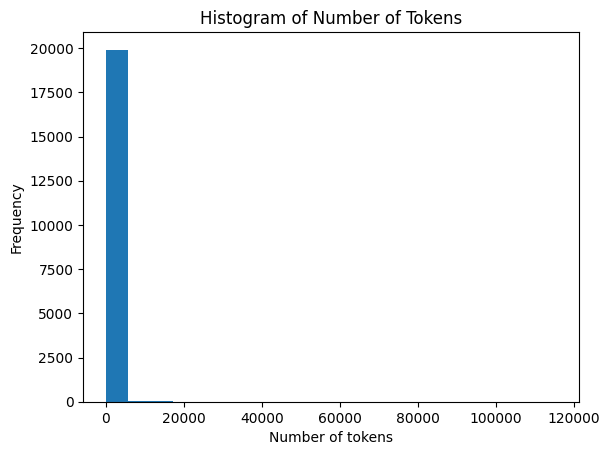

In [ ]:
plt.hist(nb_tokens, bins=20) # 20 is the number of bins you want to use
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens')
plt.show()

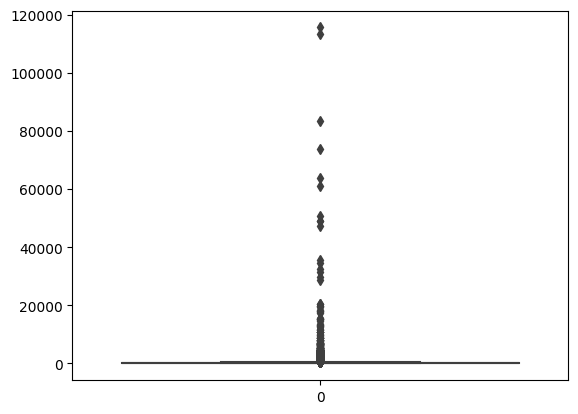

In [ ]:
plt.figure()
sns.boxplot(df_features['nb_tokens'])
plt.show()


As we can see, there are a relatively small number of very large documents which will need to be removed as most have around 21 tokens.

In [ ]:
#@title Filtering Options
min_tokens = 7 #@param { type:"integer" }
max_tokens = 70 #@param { type:"integer" }

In [ ]:
# Find out a range for `nb-tokens`
df_tokens = df_features[(df_features['nb_tokens'] >= min_tokens) & (df_features['nb_tokens'] <= max_tokens)]

nb_tokens = df_tokens['nb_tokens']
min_tokens = nb_tokens.min()
max_tokens = nb_tokens.max()
mean_tokens = nb_tokens.mean()
median_tokens = nb_tokens.median()

print(f"Minimum number of tokens: {min_tokens}")
print(f"Maximum number of tokens: {max_tokens}")
print("Mean number of tokens:", mean_tokens)
print("Median number of tokens:", median_tokens)

Minimum number of tokens: 7
Maximum number of tokens: 70
Mean number of tokens: 24.809953161592507
Median number of tokens: 21.0


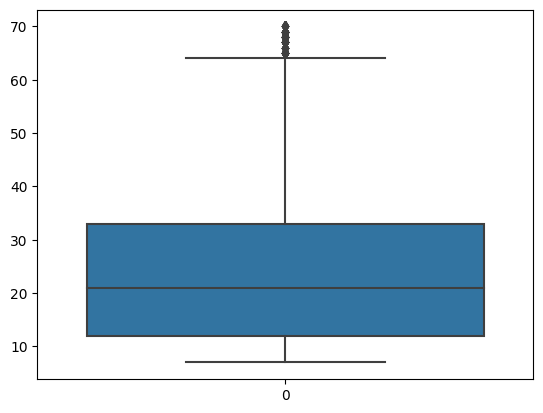

In [ ]:
plt.figure()
sns.boxplot(df_tokens['nb_tokens'].values)
plt.show()

After multiple adjustments, the optimal range of tokens appears to be between 7 and 70 tokens.

### Initial Filtering

After specifying the file containing our dataset, we load its contents into a `DataFrame` object. Some additional filtering is done on the dataset to eliminate rows:

* **Minimum Tokens**: We  filter out webpages that to not have the required minimum of tokens.
* **Maximum Tokens**: We also filter out webpages that have an outsized number of tokens,
* **Maximum Number of N-Grams**: The number of n-grams to include in our `CountVectorizer` object,
* **Non-English Webpages**: We only consider webpages written in English.


During the same filtering step, we are also going to drop all columns that have a constant value of 0:
*   mitsubishi_ufj
*   royal_mail
*   purolator
*   canada_post
*   facebook_messenger
*   tiktok
*   qq
*   wechat
*   weibo

In [ ]:
#@title Filtering Options
min_tokens = 7 #@param { type:"integer" }
max_tokens = 70 #@param { type:"integer" }
max_words = 250 #@param { type:"integer" }
english_only = True #@param { type:"boolean" }

In [ ]:
%%capture
# Remove rows containing foreign languages
if english_only and 'is_english' in df_features:
    df_features = df_features[df_features['is_english'] == True]

# Drop unneeded columns
if 'is_english' in df_features:
  df_features.drop('is_english', axis=1, inplace=True)

if 'title_raw' in df_features:
  df_features.drop('title_raw', axis=1, inplace=True)

# Remove columns that have a constant value 0

# mitsubishi_ufj
# royal_mail
# purolator
# canada_post
# facebook_messenger
# wechat
# tiktok
# qq
# weibo

if 'mitsubishi_ufj' in df_features:
  df_features.drop('mitsubishi_ufj', axis=1, inplace=True)

if 'royal_mail' in df_features:
  df_features.drop('royal_mail', axis=1, inplace=True)

if 'purolator' in df_features:
  df_features.drop('purolator', axis=1, inplace=True)

if 'canada_post' in df_features:
  df_features.drop('canada_post', axis=1, inplace=True)

if 'facebook_messenger' in df_features:
  df_features.drop('facebook_messenger', axis=1, inplace=True)

if 'wechat' in df_features:
  df_features.drop('wechat', axis=1, inplace=True)

if 'tiktok' in df_features:
  df_features.drop('tiktok', axis=1, inplace=True)

if 'qq' in df_features:
  df_features.drop('qq', axis=1, inplace=True)

if 'weibo' in df_features:
  df_features.drop('weibo', axis=1, inplace=True)  
  
# Keep rows with at the required amount of tokens
df_features = df_features[(df_features['nb_tokens'] >= min_tokens) & (df_features['nb_tokens'] <= max_tokens)]

# Remove misclassified rows
df_features = df_features[(df_features['classification'] == 'benign') | (df_features['classification'] == 'malicious')]

# Remove strings containing special characters or
# misparsed HTML tags and code.
df_features['text_clean'] = df_features['text_clean'].str.replace('_',' ',regex=True)
df_features['text_clean'] = df_features['text_clean'].str.replace('//',' ',regex=True)
df_features['text_clean'] = df_features['text_clean'].str.replace('javascript','',regex=True)
df_features['text_clean'] = df_features['text_clean'].str.replace('https','',regex=True)
df_features['text_clean'] = df_features['text_clean'].str.replace('http','',regex=True)

In [ ]:
# Save text_clean to cleaned_features table.
pd.DataFrame(df_features).to_sql("cleaned_features", con, if_exists="replace")

8205

### Dataset Information

We can now verify the remaining number of rows in our dataset. Using the sample of 20,000 websites results in a small dataset of 8,205 rows, which is relatively small. In a production environment, we would be using the full dataset of 380,000 samples, but for the sake of demonstrating the process, we will keep this small set for now.

#### Size

In [ ]:
print(f"The features dataset contains {df_features.shape[0]} rows and {df_features.shape[1]} columns.")

The features dataset contains 8205 rows and 38 columns.


#### Empty Columns

In [ ]:
df_features.isnull().sum()

title_clean          0
img_count            0
has_form             0
has_login_form       0
has_js               0
js_include_b64       0
nb_tokens            0
text_clean           0
classification       0
nb_title_entities    0
nb_text_entities     0
jpmorgan_chase       0
bank_of_america      0
wells_fargo          0
hsbc                 0
deutsche_bank        0
citibank             0
rbc                  0
paypal               0
scotiabank           0
apple                0
microsoft            0
amazon               0
google               0
samsung              0
facebook             0
steam                0
netflix              0
ups                  0
fedex                0
dhl                  0
tnt                  0
usps                 0
youtube              0
whatsapp             0
instagram            0
linkedin             0
twitter              0
dtype: int64

### Labels

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_features.head()

title_clean  img_count  has_form  has_login_form  \
0                         one drive          1         0               0   
4                          no title          6         1               1   
5   email security : : user account          0         1               1   
8           sign in to your account          4         1               1   
10                      worldclient          2         1               1   

    has_js  js_include_b64  nb_tokens  \
0        1               0         31   
4        0               0          7   
5        1               0         19   
8        0               0         14   
10       1               0         13   

                                           text_clean classification  \
0   one drive read document please choose email pr...      malicious   
4   gjin.jung samsung.com 3c 95338 2017 icp0803424...      malicious   
5   email security user account verification neede...      malicious   
8   sign account nobody mycraftmail.com enter pass...      malicious   
10  worldclient microsoft office verification port...      malicious   

    nb_title_entities  ...  ups  fedex  dhl  tnt  usps  youtube  whatsapp  \
0                 0.0  ...  0.0    0.0  0.0  0.0   0.0      0.0       0.0   
4                 0.0  ...  0.0    0.0  0.0  0.0   0.0      0.0       0.0   
5                 0.0  ...  0.0    0.0  0.0  0.0   0.0      0.0       0.0   
8                 0.0  ...  0.0    0.0  0.0  0.0   0.0      0.0       0.0   
10                0.0  ...  0.0    0.0  0.0  0.0   0.0      0.0       0.0   

    instagram  linkedin  twitter  
0         0.0       0.0      0.0  
4         0.0       0.0      0.0  
5         0.0       0.0      0.0  
8         0.0       0.0      0.0  
10        0.0       0.0      0.0  

[5 rows x 38 columns]

Text(0, 0.5, 'Count')

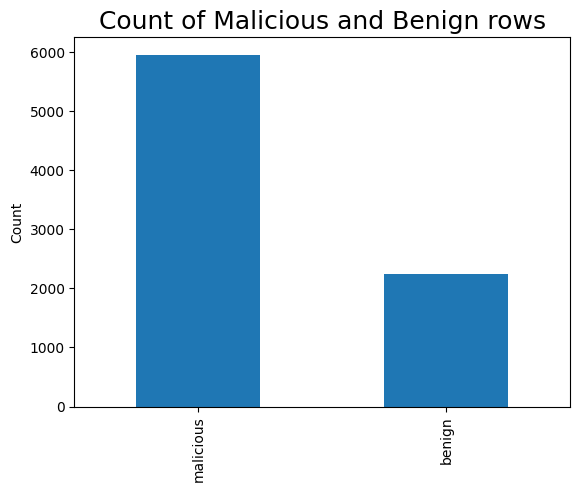

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['classification'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of Malicious and Benign rows",fontsize=18)
plt.ylabel("Count")

#### Form Data

Text(0, 0.5, 'Count')

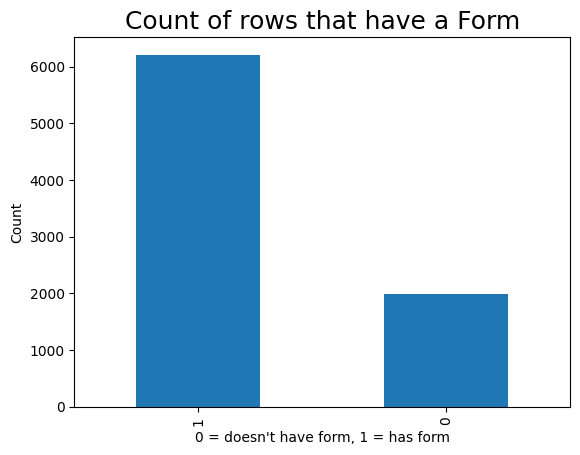

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['has_form'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have a Form", fontsize=18)
plt.xlabel("0 = doesn't have form, 1 = has form")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

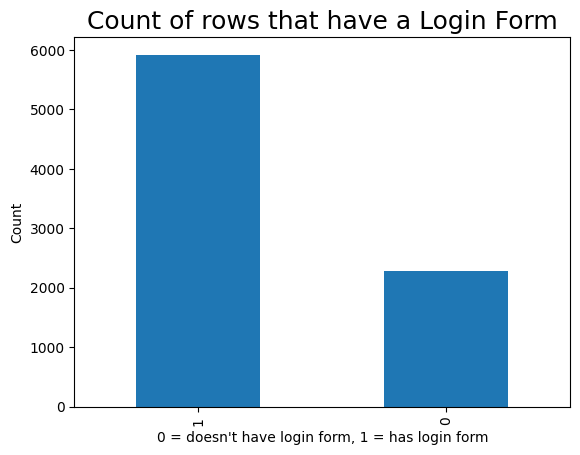

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['has_login_form'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have a Login Form", fontsize=18)
plt.xlabel("0 = doesn't have login form, 1 = has login form")
plt.ylabel("Count")

#### JavaScript Data

The presence of JavaScript from webpages is collected. _JavaScript_ is widely used on many webpages to provide dynamic content. It can also be used for cross-site scripting and inject remote malicious code in the page.

Text(0, 0.5, 'Count')

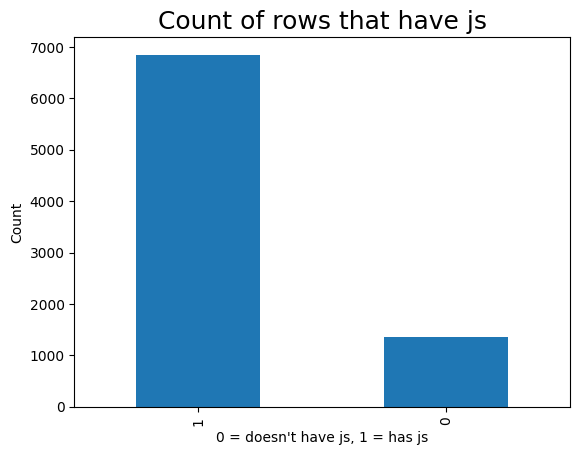

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['has_js'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have js", fontsize=18)
plt.xlabel("0 = doesn't have js, 1 = has js")
plt.ylabel("Count")

We collect information about the presence of Base64 encoded-string in webpages. _Base64_ is often used to obfuscated malicious JavaScript code. While this is not common, when this feature is present, there may be a high correlation between this feature the malicious webpages.

Text(0, 0.5, 'Count')

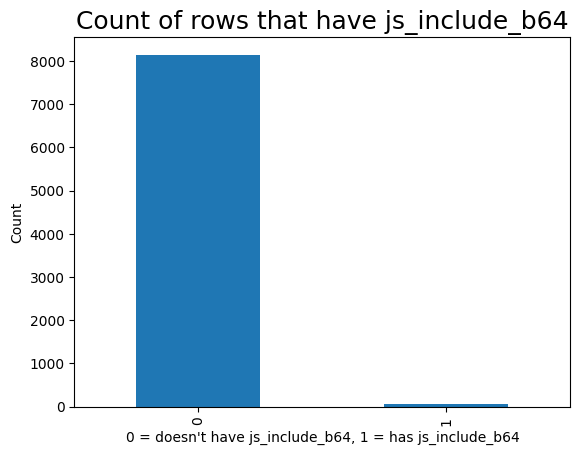

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['js_include_b64'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have js_include_b64", fontsize=18)
plt.xlabel("0 = doesn't have js_include_b64, 1 = has js_include_b64")
plt.ylabel("Count")

Text(0.5, 0, 'Number of images')

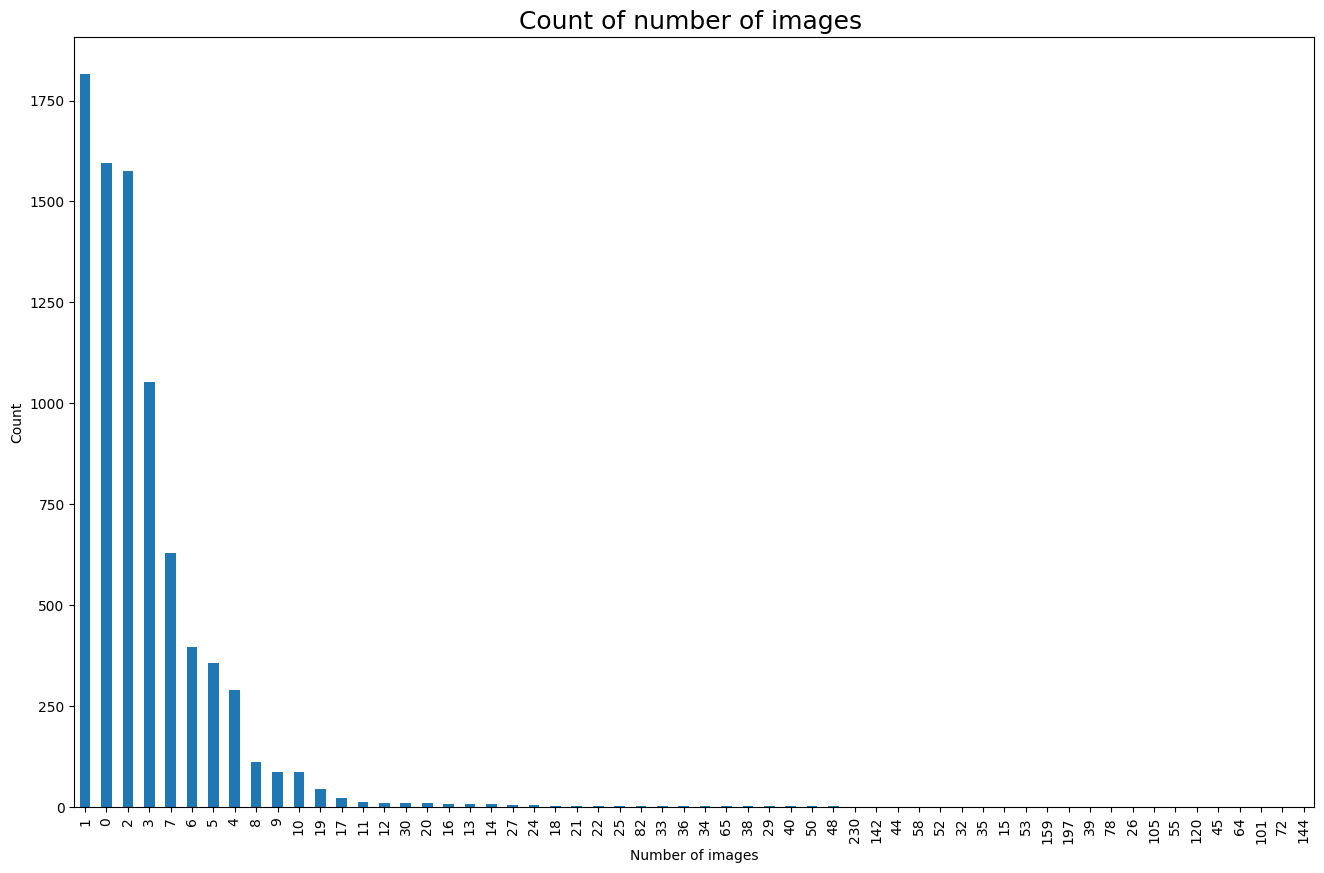

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['img_count'].value_counts()

# Plot the histogram
plt.figure(figsize=(16,10))
classification_counts.plot(kind='bar')
plt.title("Count of number of images ", fontsize=18)
plt.ylabel("Count")
plt.xlabel("Number of images")

Text(0.5, 0, 'nb_title_entities')

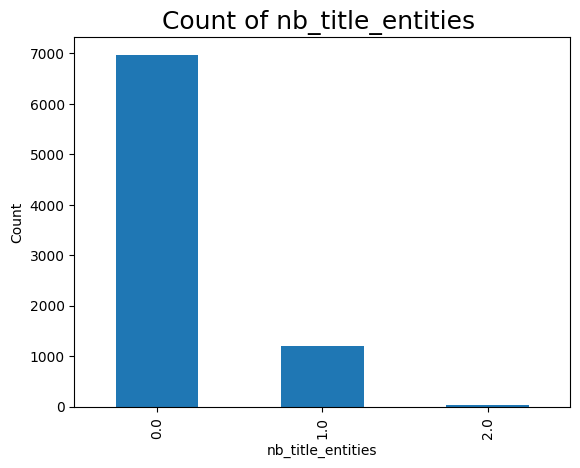

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['nb_title_entities'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of nb_title_entities ", fontsize=18)
plt.ylabel("Count")
plt.xlabel("nb_title_entities")

Text(0, 0.5, 'Count')

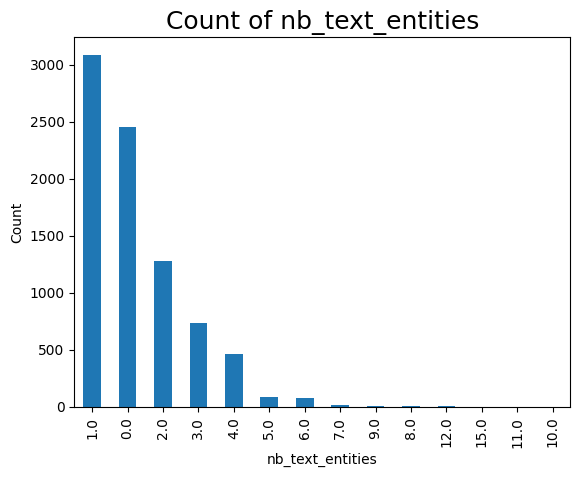

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['nb_text_entities'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of nb_text_entities", fontsize=18)
plt.xlabel("nb_text_entities")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

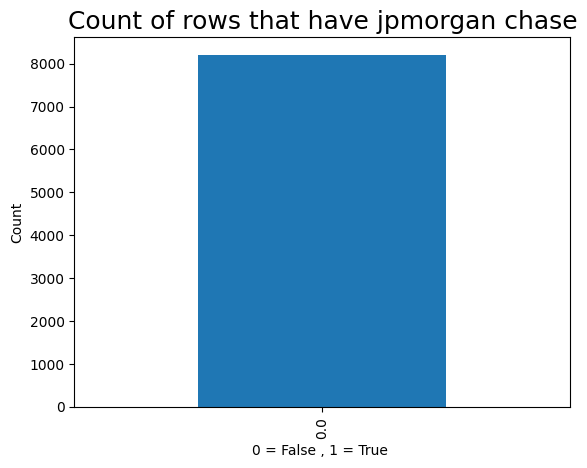

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['jpmorgan_chase'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have jpmorgan chase", fontsize=18)
plt.xlabel("0 = False , 1 = True ")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

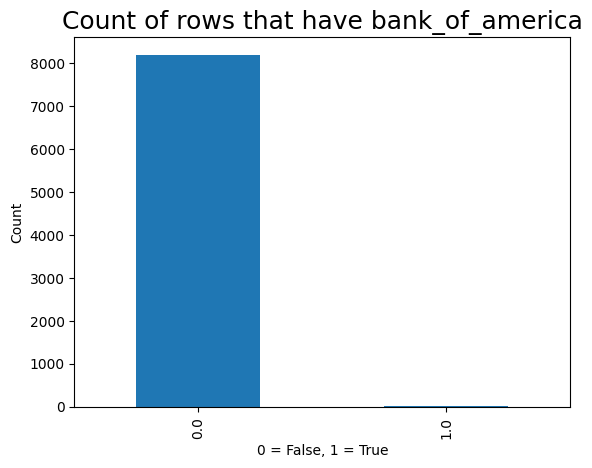

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['bank_of_america'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have bank_of_america", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

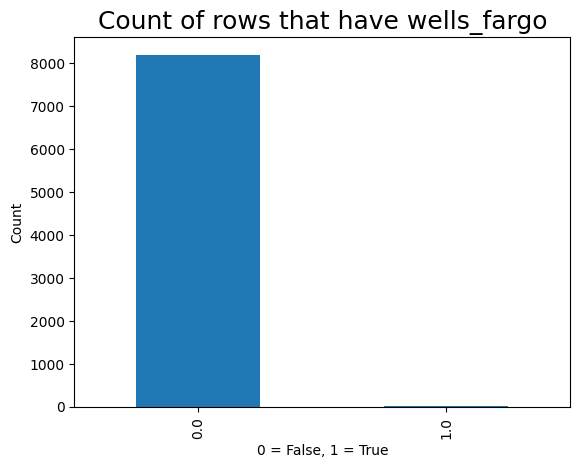

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['wells_fargo'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have wells_fargo", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

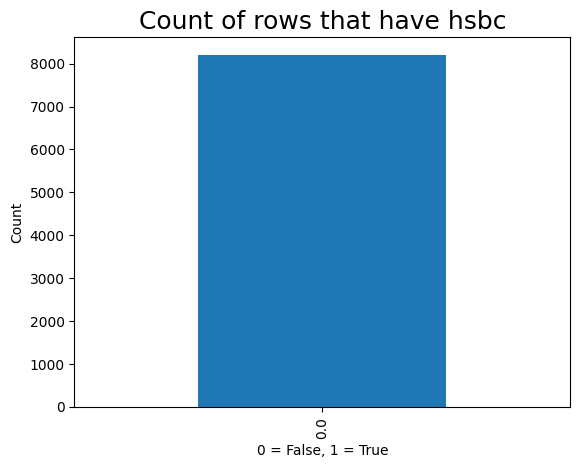

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['hsbc'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have hsbc", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

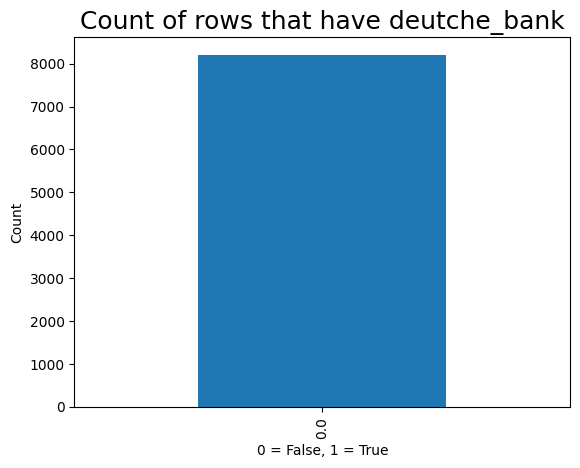

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['deutsche_bank'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have deutche_bank", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

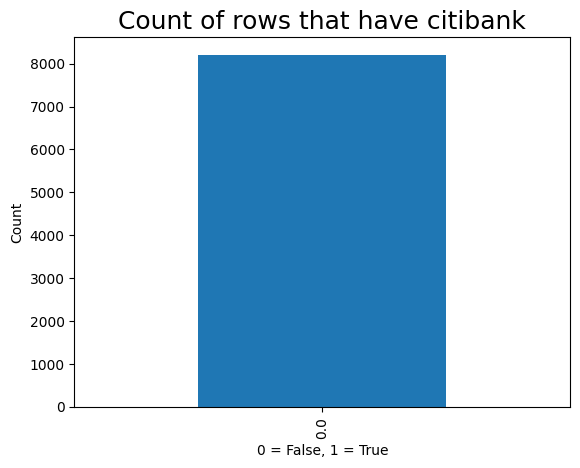

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['citibank'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have citibank",fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

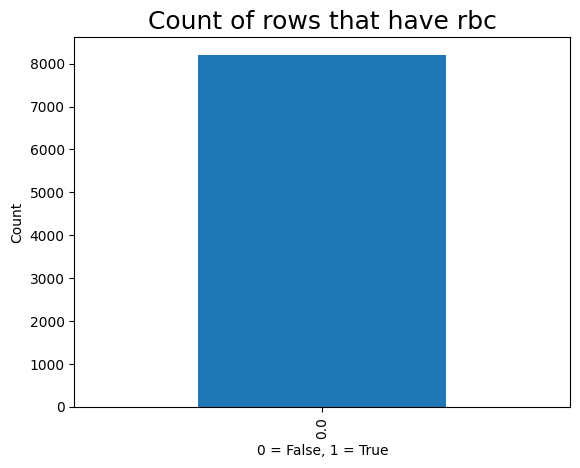

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['rbc'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have rbc", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

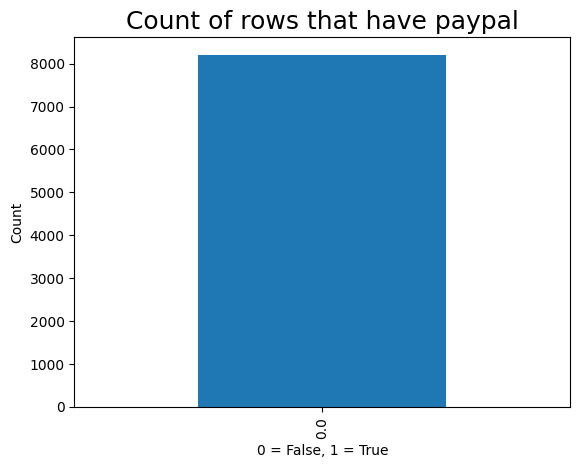

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['paypal'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have paypal", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

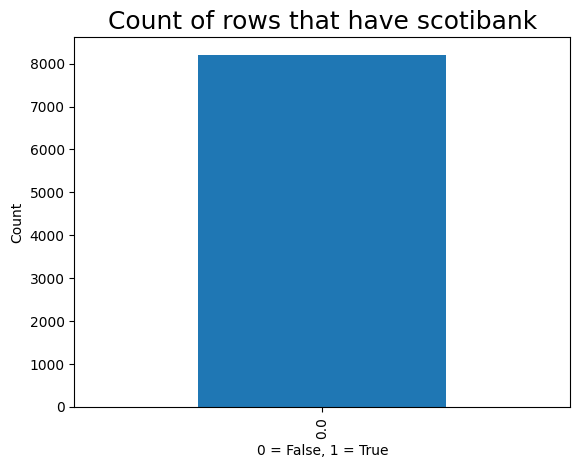

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['scotiabank'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have scotibank", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

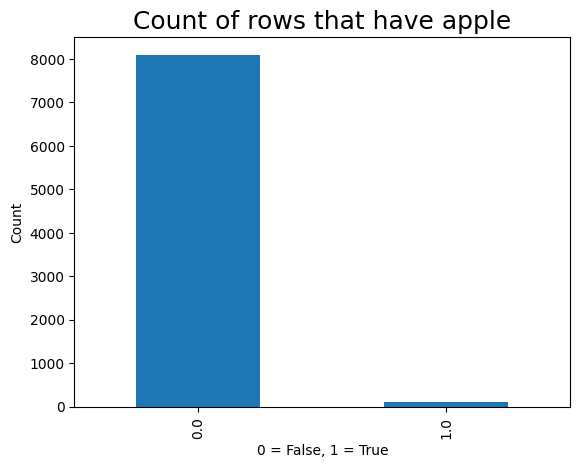

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['apple'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have apple", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

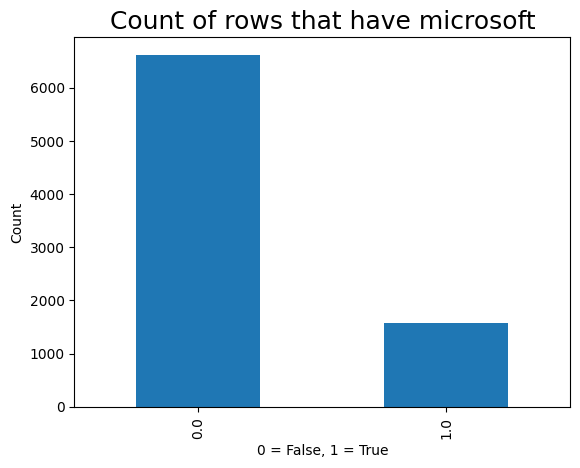

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['microsoft'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have microsoft", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

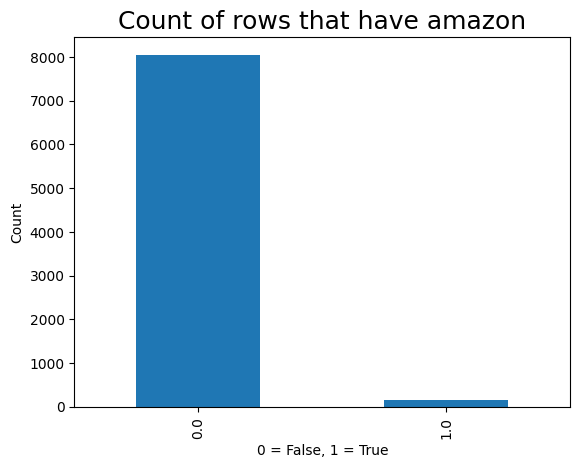

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['amazon'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have amazon", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

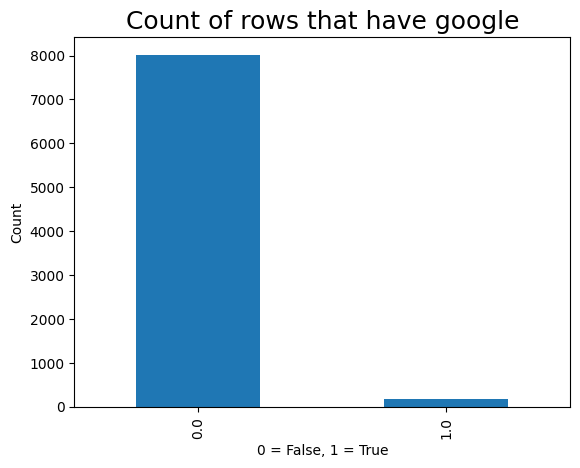

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['google'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have google", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

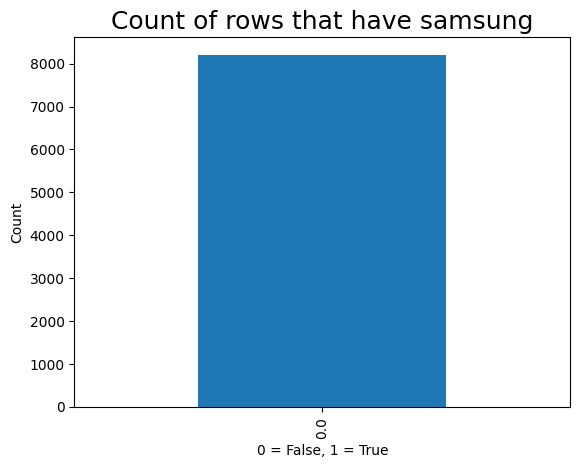

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['samsung'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have samsung", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

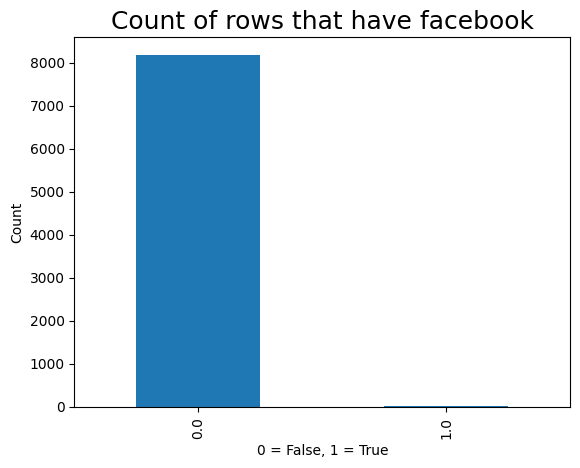

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['facebook'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have facebook", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

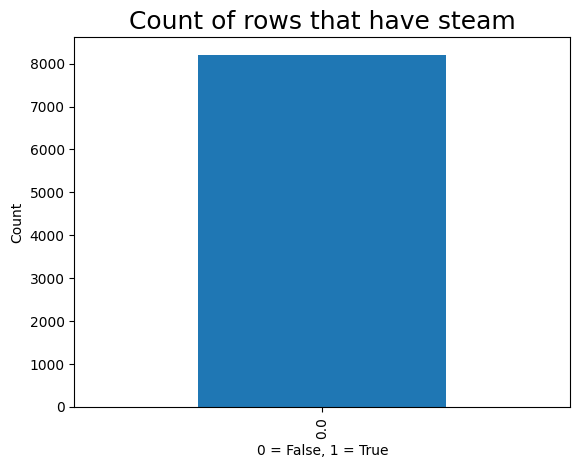

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['steam'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have steam", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

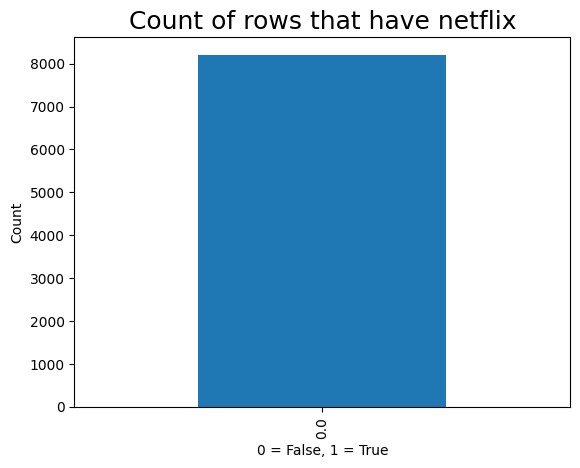

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['netflix'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have netflix", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

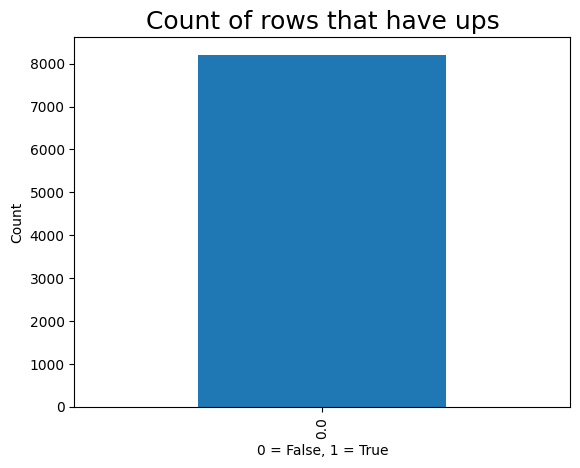

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['ups'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have ups", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

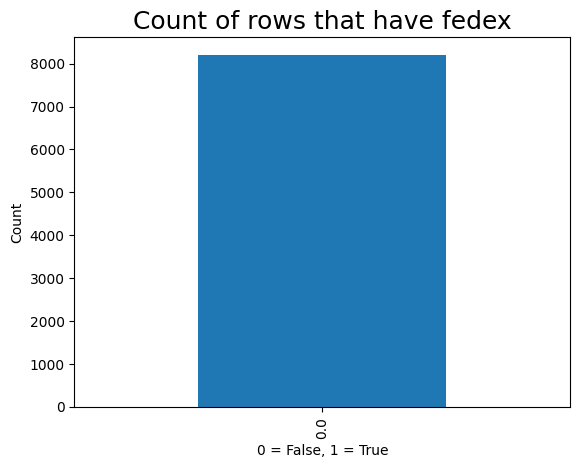

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['fedex'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have fedex", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

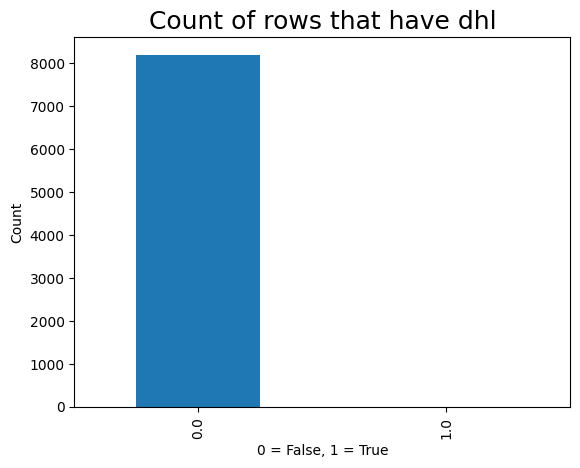

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['dhl'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have dhl", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

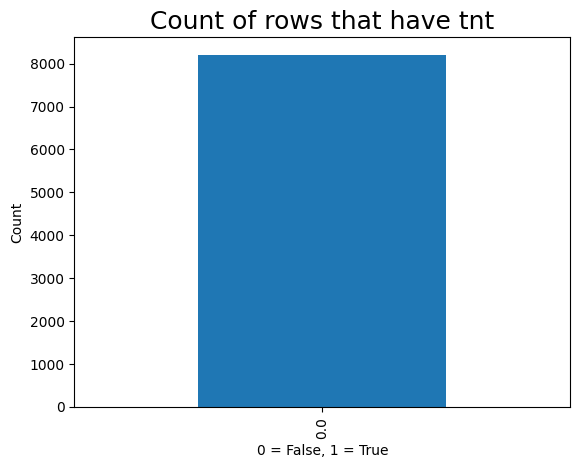

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['tnt'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have tnt", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

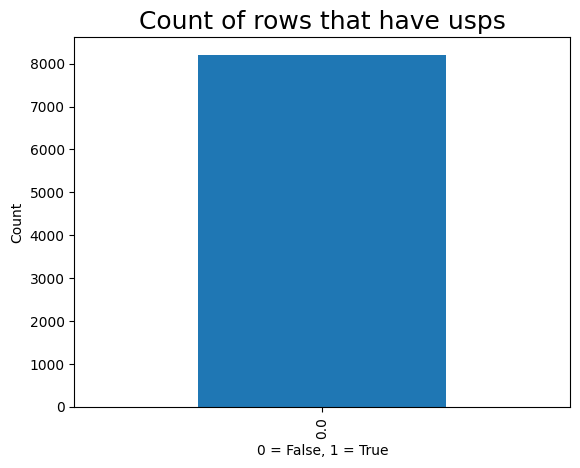

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['usps'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have usps", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

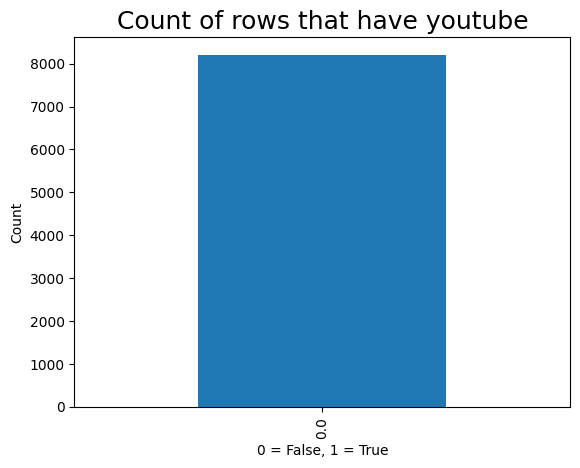

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['youtube'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have youtube", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

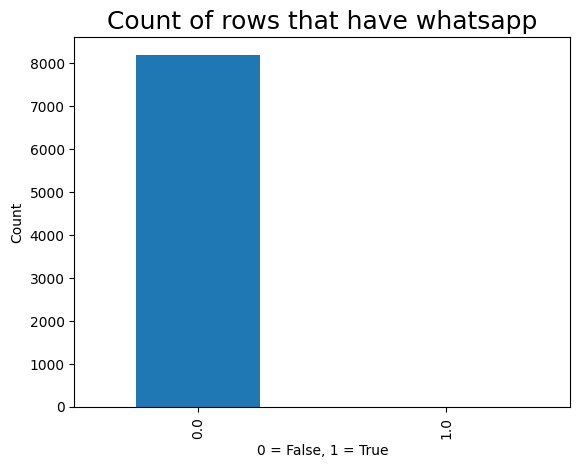

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['whatsapp'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have whatsapp", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

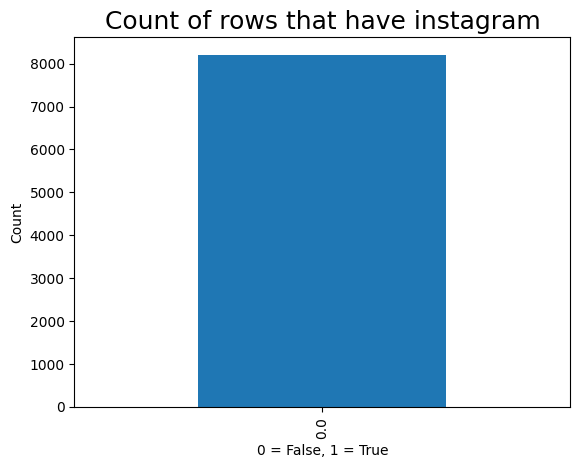

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['instagram'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have instagram", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

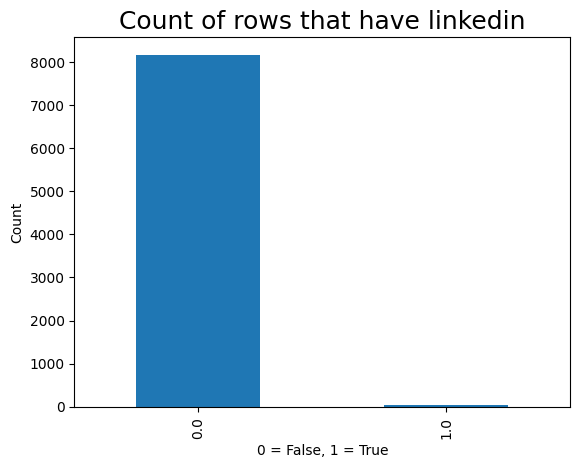

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['linkedin'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have linkedin", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

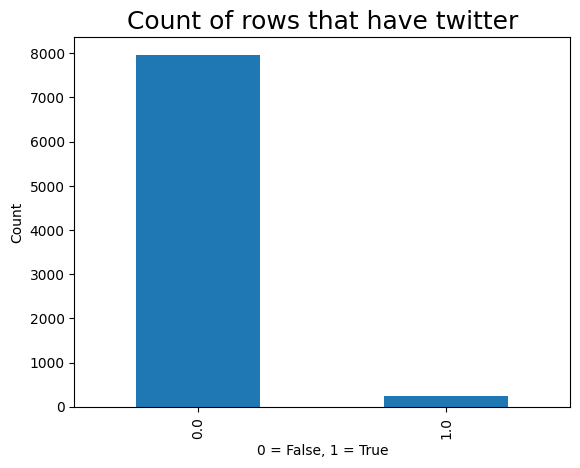

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['twitter'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of rows that have twitter", fontsize=18)
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Count")

We then perform some additional cleaning and filtering on the dataset generated. 

### Review of Form Data

Text(0, 0.5, 'Count')

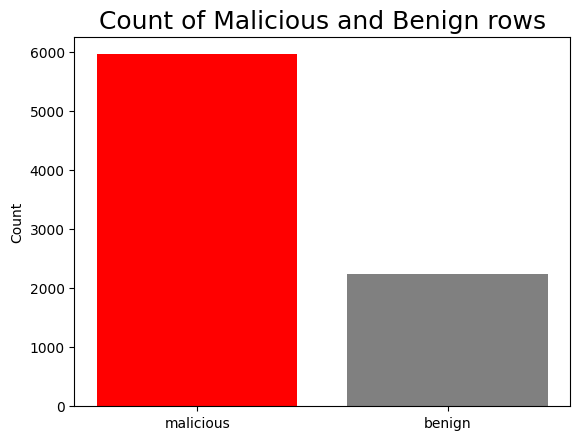

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_features['classification'].value_counts()

# Plot the histogram
plt.bar(classification_counts.index,classification_counts, color=['red', 'grey'])
plt.title("Count of Malicious and Benign rows",fontsize=18)
plt.ylabel("Count")

By reviewing the labels, we notice that there is a larger number of malicious samples than benign ones, which may require us to consider when generating our classifier to have a more balanced distribution.

We also discovered that after the initial filtering step where we limited the number of tokens, the following features now have a constant 0:
*   jpmorgan_chase
*   hsbc
*   deutsche_bank
*   citibank
*   paypal
*   scotiabank
*   samsung
*   steam
*   netflix
*   ups
*   fedex
*   tnt
*   usps
*   instagram

We are simply going to remove all these columns.

In [ ]:
# Remove columns that have a constant value 0 (after initial filtering)

# jpmorgan_chase
# hsbc
# deutsche_bank
# citibank
# paypal
# scotiabank
# samsung
# steam
# netflix
# ups
# fedex
# tnt
# usps
# instagram

if 'jpmorgan_chase' in df_features:
  df_features.drop('jpmorgan_chase', axis=1, inplace=True)

if 'hsbc' in df_features:
  df_features.drop('hsbc', axis=1, inplace=True)

if 'deutsche_bank' in df_features:
  df_features.drop('deutsche_bank', axis=1, inplace=True)

if 'rbc' in df_features:
  df_features.drop('rbc', axis=1, inplace=True)

if 'paypal' in df_features:
  df_features.drop('paypal', axis=1, inplace=True)

if 'scotiabank' in df_features:
  df_features.drop('scotiabank', axis=1, inplace=True)

if 'samsung' in df_features:
  df_features.drop('samsung', axis=1, inplace=True)

if 'steam' in df_features:
  df_features.drop('steam', axis=1, inplace=True)

if 'netflix' in df_features:
  df_features.drop('netflix', axis=1, inplace=True)

if 'ups' in df_features:
  df_features.drop('ups', axis=1, inplace=True)

if 'fedex' in df_features:
  df_features.drop('fedex', axis=1, inplace=True)

if 'tnt' in df_features:
  df_features.drop('tnt', axis=1, inplace=True)

if 'usps' in df_features:
  df_features.drop('usps', axis=1, inplace=True)

if 'instagram' in df_features:
  df_features.drop('instagram', axis=1, inplace=True)


The focus is then shifted into analysing the tokens extracted from the text of each website remaining in the dataset.

In [ ]:
# Save df_features to filtered_features table.
pd.DataFrame(df_features).to_sql("filtered_features", con, if_exists="replace")

8205

## Text Analysis

### Generate WordClouds

In [ ]:
import numpy as np # linear algebra

#### Helper functions

In [ ]:
import re
from bs4 import BeautifulSoup
from html import unescape

def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string 

In [ ]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

#### Filter for Malicious and Consume the helper functions

In [ ]:
df_text_clean = df_features[(df_features['classification'] == 'malicious')][['text_clean']].copy()
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_urls)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(unescape_stuff)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_symbols)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(unify_whitespaces)

<ipython-input-70-cc4f7966ef48>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(unescape(x), 'lxml')


#### Prepare the stopwords removal function

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')

# Add custom stop words here:
custom_stop_words = ["com", "ca", "go", "td", "tr"
            "px", "co", "uv", "ru",
            "mx", "also", "use", "abc",
            "wo", "may", "oo", "javascript", "www",
            "html", "id", "class", "http", "https"]

cachedStopWords = sp.Defaults.stop_words
cachedStopWords = [x.lower() for x in cachedStopWords]
cachedStopWords.extend(list(stopwords.words('english')))
cachedStopWords.extend(list(custom_stop_words))
cachedStopWords = list(set(cachedStopWords))

def remove_stopwords(x):
    
    meaningful_words = []
    my_list = x
    
    tokenized_my_list = word_tokenize(my_list) 
    meaningful_words = [w for w in tokenized_my_list if not w in cachedStopWords]
        
    return " ".join(meaningful_words)

#### Remove english stopwords

In [ ]:
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_stopwords)

#### NGram function

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

#### Extract the Malicious 1-grams

In [ ]:
df_text_clean["onegram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=1)

#### Extract the Malicious bigrams

In [ ]:
df_text_clean["bigram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=2)

#### Extract the Malicious trigrams



In [ ]:
df_text_clean["trigram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=3)

### Creating a List of Tokens from a List of Documents

In [ ]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
# transform list of documents into a single list of tokens
onegram_tokens = df_text_clean.onegram_text.map(my_tokenizer).sum()
bigram_tokens = df_text_clean.bigram_text.map(my_tokenizer).sum()
trigram_tokens = df_text_clean.trigram_text.map(my_tokenizer).sum()

In [ ]:
from collections import Counter

### Most Common Malicious Words

#### Most Common Malicious 1-grams

In [ ]:
onegram_counter = Counter(onegram_tokens)
onegram_counter.most_common(20)

[('sign', 6899),
 ('account', 6084),
 ('password', 5880),
 ('login', 2816),
 ('microsoft', 2565),
 ('privacy', 2444),
 ('enter', 2312),
 ('email', 2225),
 ('term', 1940),
 ('cooky', 1933),
 ('webmail', 1639),
 ('mycraftmail', 1422),
 ('forgot', 1411),
 ('signed', 1155),
 ('n', 1134),
 ('document', 1010),
 ('create', 923),
 ('access', 917),
 ('2019', 916),
 ('security', 889)]

Most Common Malicious 1-grams


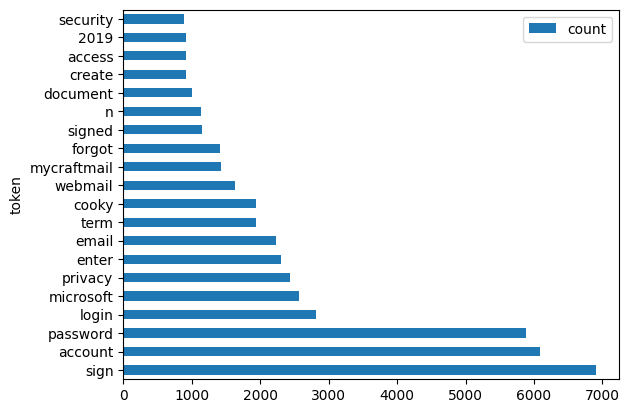

In [ ]:
print('Most Common Malicious 1-grams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(onegram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

#### Most Common Malicious bigrams

In [ ]:
bigram_counter = Counter(bigram_tokens)
bigram_counter.most_common(20)

[('privacy_cooky', 1792),
 ('enter_password', 1518),
 ('sign_account', 1404),
 ('forgot_password', 1227),
 ('term_privacy', 1218),
 ('microsoft_term', 855),
 ('microsoft_account', 849),
 ('account_create', 812),
 ('account_sign', 802),
 ('right_reserved', 689),
 ('password_sign', 685),
 ('account_account', 627),
 ('username_password', 624),
 ('email_address', 611),
 ('signed_forgot', 609),
 ('email_password', 592),
 ('sign_microsoft', 584),
 ('access_account', 544),
 ('2019_microsoft', 510),
 ('password_signed', 505)]

Most Common Malicious bigrams


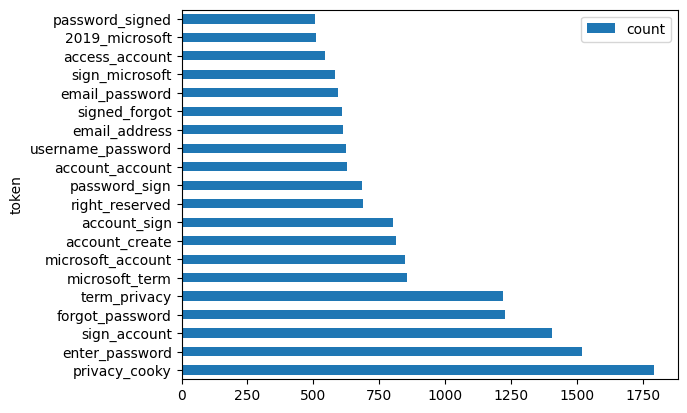

In [ ]:
print('Most Common Malicious bigrams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(bigram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

#### Most Common Malicious trigrams

In [ ]:
trigram_counter = Counter(trigram_tokens)
trigram_counter.most_common(20)

[('term_privacy_cooky', 1166),
 ('microsoft_term_privacy', 854),
 ('signed_forgot_password', 609),
 ('sign_microsoft_account', 521),
 ('enter_password_signed', 443),
 ('sign_security_key', 429),
 ('security_key_sign', 428),
 ('key_sign_option', 428),
 ('mycraftmail_enter_password', 410),
 ('account_create_sign', 409),
 ('account_mycraftmail_enter', 407),
 ('create_sign_security', 406),
 ('password_signed_forgot', 401),
 ('forgot_password_sign', 399),
 ('account_account_create', 386),
 ('inc_right_reserved', 380),
 ('2019_microsoft_term', 373),
 ('privacy_cooky_term', 372),
 ('sign_account_sign', 367),
 ('username_password_webmail', 348)]

Most Common Malicious trigrams


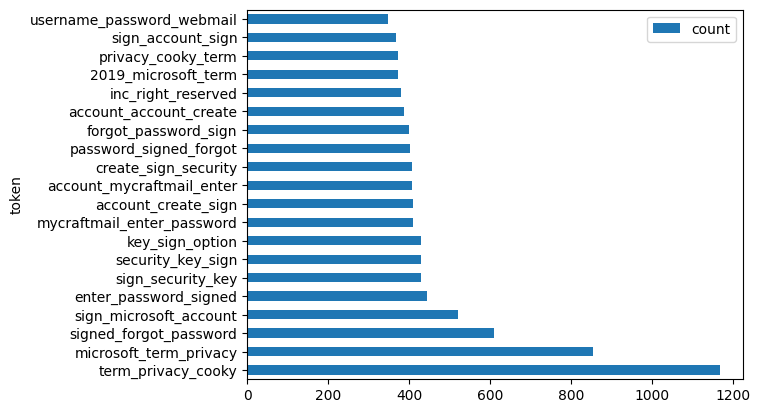

In [ ]:
print('Most Common Malicious trigrams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(trigram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

### Malicious 1-gram WordCloud

#### Put the Malicious 1-grams in one long string



In [ ]:
onegram_string_list = df_text_clean['onegram_text'].tolist()
onegram_string = ' '.join(onegram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=200, 
                      collocations=False, 
                      normalize_plurals=False).generate(onegram_string)

#### Plot the Malicious 1-grams

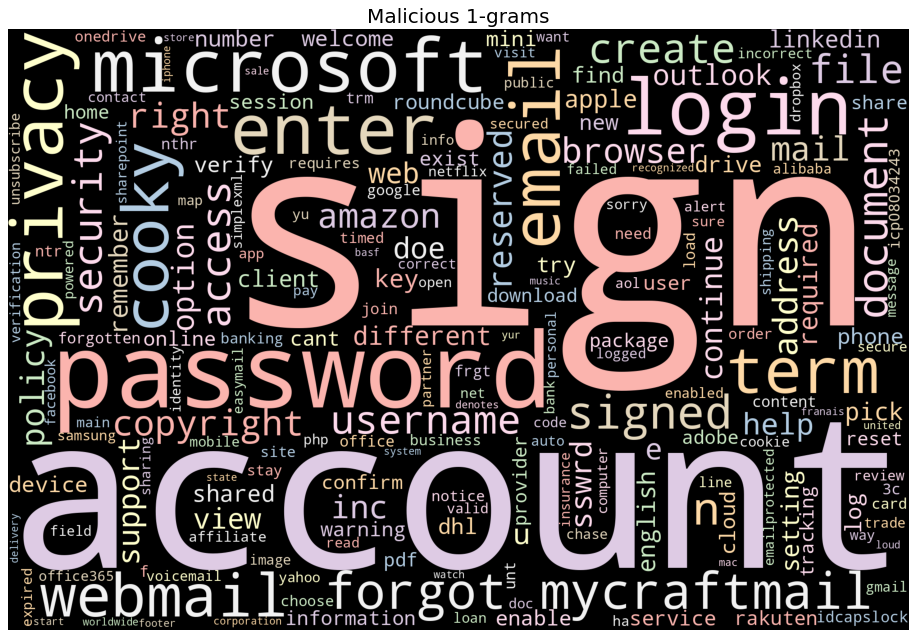

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Malicious 1-grams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)   

### Malicious Bigram WordCloud

#### Put the Malicious bigrams in one long string

In [ ]:
bigram_string_list = df_text_clean['bigram_text'].tolist()
bigram_string = ' '.join(bigram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=75, 
                      collocations=False, 
                      normalize_plurals=False).generate(bigram_string)

#### Plot the Malicious bigrams

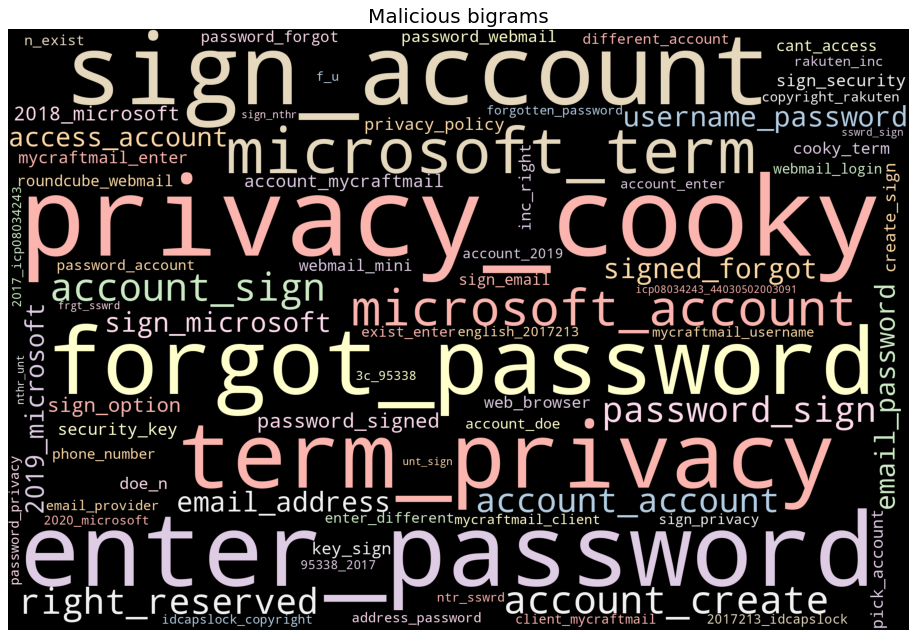

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Malicious bigrams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)   

### Malicious Trigram WordCloud

#### Put the Malicious trigrams in one long string

In [ ]:
trigram_string_list = df_text_clean['trigram_text'].tolist()
trigram_string = ' '.join(trigram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=50, 
                      collocations=False, 
                      normalize_plurals=False).generate(trigram_string)

#### Plot the Malicious trigrams

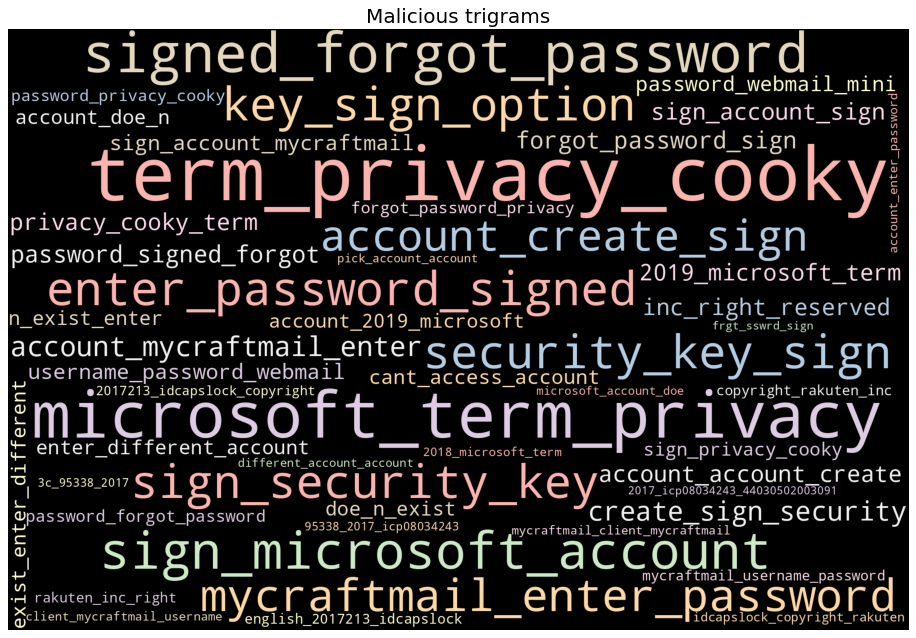

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Malicious trigrams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

plot_cloud(wordcloud)

#### Filter for Benign and Consume the helper functions

In [ ]:
df_text_clean = df_features[(df_features['classification'] == 'benign')][['text_clean']].copy()
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_urls)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(unescape_stuff)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_symbols)
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(unify_whitespaces)

<ipython-input-70-cc4f7966ef48>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(unescape(x), 'lxml')


#### Remove english stopwords

In [ ]:
df_text_clean['text_clean'] = df_text_clean['text_clean'].apply(remove_stopwords)

#### Extract the Benign 1-grams

In [ ]:
df_text_clean["onegram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=1)

#### Extract the Benign bigrams

In [ ]:
df_text_clean["bigram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=2)

#### Extract the Benign trigrams

In [ ]:
df_text_clean["trigram_text"] = df_text_clean["text_clean"].apply(get_ngrams, n=3)

### Creating a List of Tokens from a List of Documents

In [ ]:
# transform list of documents into a single list of tokens
onegram_tokens = df_text_clean.onegram_text.map(my_tokenizer).sum()
bigram_tokens = df_text_clean.bigram_text.map(my_tokenizer).sum()
trigram_tokens = df_text_clean.trigram_text.map(my_tokenizer).sum()

### Most Common Benign Words

#### Most Common Benign 1-grams

In [ ]:
onegram_counter = Counter(onegram_tokens)
onegram_counter.most_common(20)

[('email', 1467),
 ('password', 1124),
 ('sign', 1023),
 ('login', 888),
 ('account', 856),
 ('privacy', 654),
 ('browser', 598),
 ('term', 579),
 ('google', 539),
 ('contact', 522),
 ('help', 520),
 ('address', 503),
 ('1', 466),
 ('debtwire', 465),
 ('policy', 448),
 ('support', 404),
 ('disabled', 398),
 ('cooky', 382),
 ('2020', 351),
 ('u', 348)]

Most Common Benign 1-grams


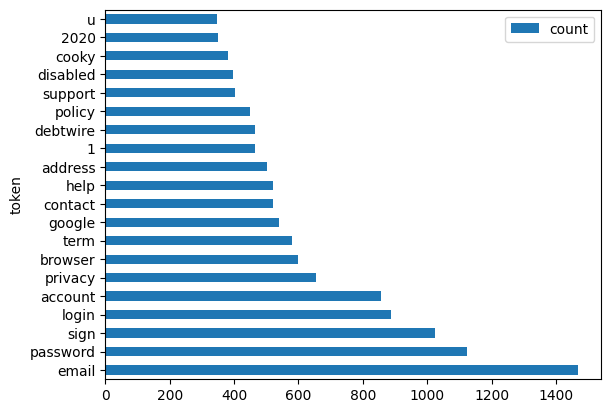

In [ ]:
print('Most Common Benign 1-grams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(onegram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

#### Most Common Benign bigrams

In [ ]:
bigram_counter = Counter(bigram_tokens)
bigram_counter.most_common(20)

[('email_address', 454),
 ('disabled_browser', 382),
 ('debtwire_login', 310),
 ('right_reserved', 266),
 ('password_remember', 265),
 ('forgot_password', 239),
 ('went_wrong', 239),
 ('detected_disabled', 229),
 ('browser_like', 229),
 ('like_proceed', 229),
 ('proceed_legacy', 229),
 ('legacy_twitter', 229),
 ('twitter_yes', 229),
 ('yes_went', 229),
 ('wrong_dont', 229),
 ('dont_fret', 229),
 ('fret_let', 229),
 ('let_shot', 229),
 ('privacy_policy', 209),
 ('cookie_policy', 198)]

Most Common Benign bigrams


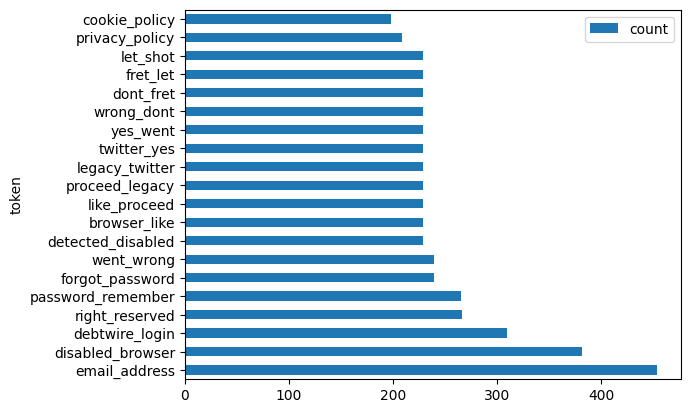

In [ ]:
print('Most Common Benign bigrams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(bigram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

#### Most Common Benign trigrams

In [ ]:
trigram_counter = Counter(trigram_tokens)
trigram_counter.most_common(20)

[('detected_disabled_browser', 229),
 ('disabled_browser_like', 229),
 ('browser_like_proceed', 229),
 ('like_proceed_legacy', 229),
 ('proceed_legacy_twitter', 229),
 ('legacy_twitter_yes', 229),
 ('twitter_yes_went', 229),
 ('yes_went_wrong', 229),
 ('went_wrong_dont', 229),
 ('wrong_dont_fret', 229),
 ('dont_fret_let', 229),
 ('fret_let_shot', 229),
 ('password_logging_agree', 158),
 ('debtwire_login_debtwire', 155),
 ('login_debtwire_login', 155),
 ('debtwire_login_debtwirecreated', 155),
 ('login_debtwirecreated_sketch', 155),
 ('debtwirecreated_sketch_sign', 155),
 ('sketch_sign_username', 155),
 ('sign_username_cap', 155)]

Most Common Benign trigrams


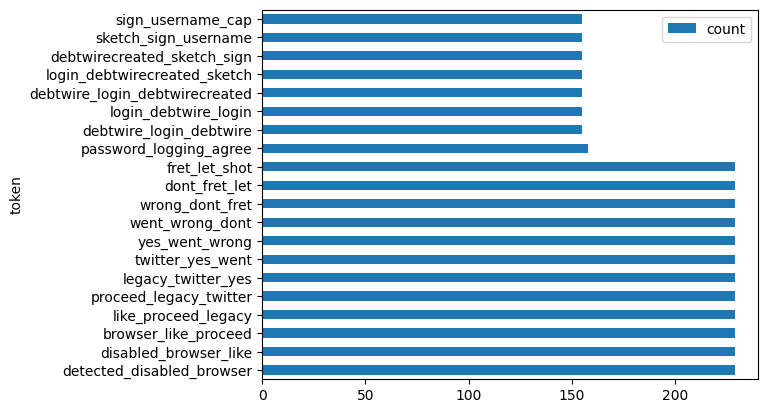

In [ ]:
print('Most Common Benign trigrams')

# convert list of tuples into data frame
most_common_words_df = pd.DataFrame.from_records(trigram_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
most_common_words_df.plot(kind='barh', x='token');

### Benign 1-gram WordCloud

#### Put the Benign 1-grams in one long string

In [ ]:
onegram_string_list = df_text_clean['onegram_text'].tolist()
onegram_string = ' '.join(onegram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=200, 
                      collocations=False, 
                      normalize_plurals=False).generate(onegram_string)

#### Plot the Benign 1-grams

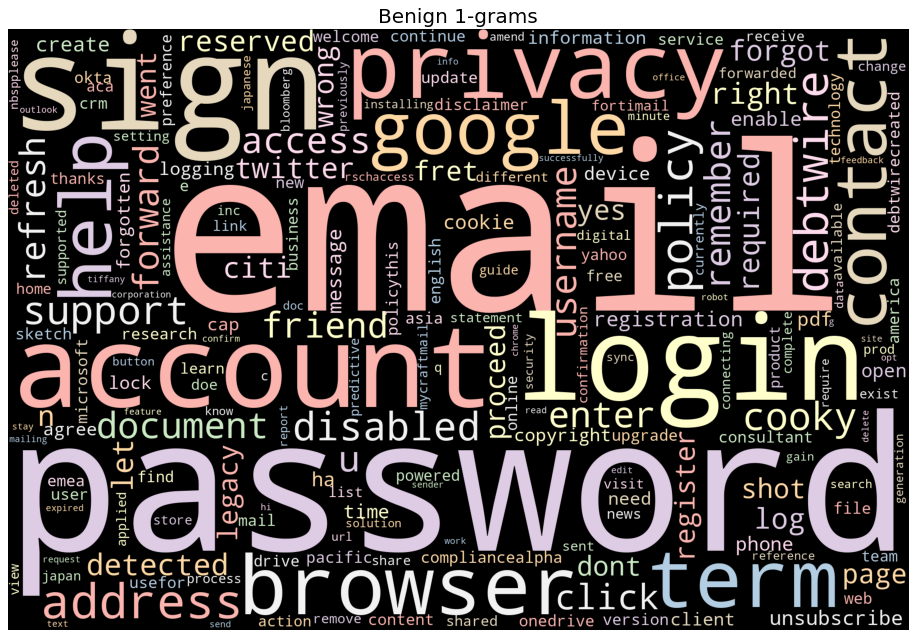

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Benign 1-grams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)   

### Benign Bigram WordCloud

#### Put the Benign bigrams in one long string

In [ ]:
bigram_string_list = df_text_clean['bigram_text'].tolist()
bigram_string = ' '.join(bigram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=75, 
                      collocations=False, 
                      normalize_plurals=False).generate(bigram_string)

#### Plot the Benign bigrams

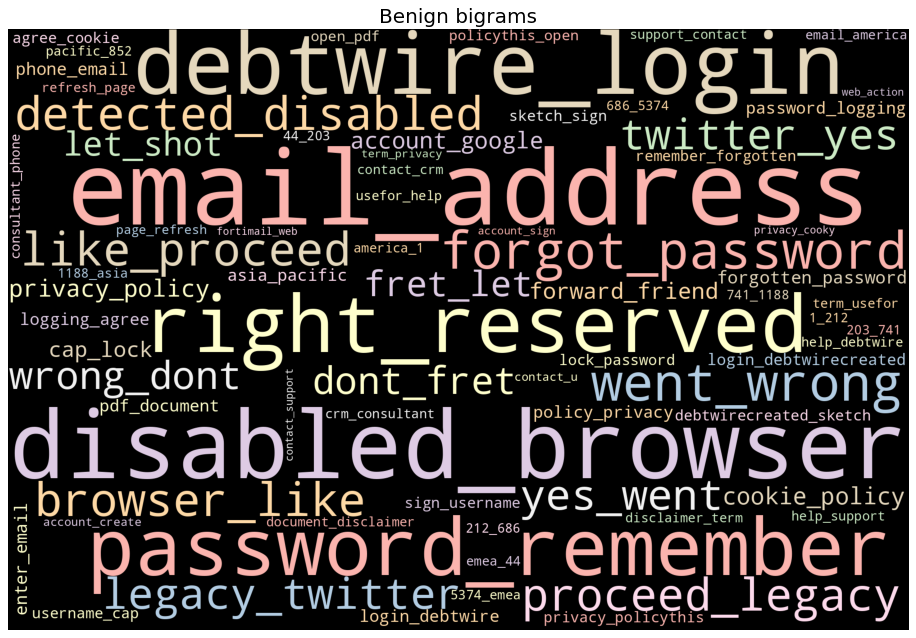

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Benign bigrams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 
   
#Plot
plot_cloud(wordcloud)   

### Benign Trigram WordCloud

#### Put the Benign trigrams in one long string

In [ ]:
trigram_string_list = df_text_clean['trigram_text'].tolist()
trigram_string = ' '.join(trigram_string_list)

In [ ]:
from wordcloud import WordCloud   # for the wordcloud
wordcloud = WordCloud(width=2000, 
                      height=1334, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      max_words=50, 
                      collocations=False, 
                      normalize_plurals=False).generate(trigram_string)

#### Plot the Benign trigrams

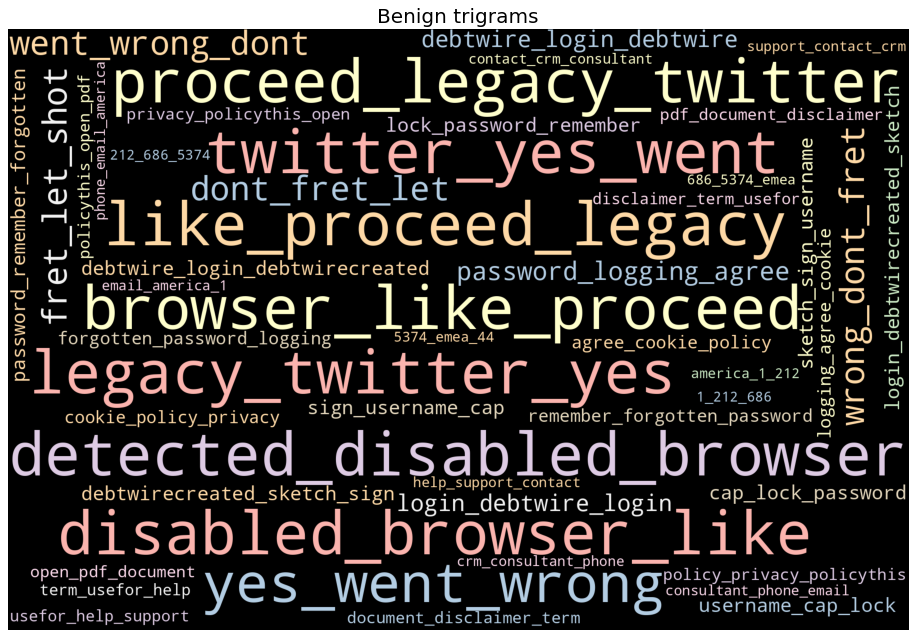

In [ ]:
# create the wordcloud
import matplotlib.pyplot as plt   # for wordclouds & charts
from matplotlib.pyplot import figure

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    plt.title("Benign trigrams", fontsize=18)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

plot_cloud(wordcloud)

### Text Analysis Summary

When inspecting the top 20 1-grams the following 8 words appear in both Malicious and Benign lists:
*   email
*   password
*   sign
*   login
*   account
*   privacy
*   term
*   cooky

When inspecting the top 20 bigrams the following 3 words appear in both Malicious and Benign lists:
*   email_address
*   right_reserved
*   forgot_password

When inspecting the top 20 trigrams none appear in both lists. 

Since it is very difficult to classify an email as Malicious or Benign based on 1-grams, we will perform our classification based on bigrams and trigrams.



## Feature Engineering

### Stop Words

After multiple iterations, custom stop words were included from the default English stop words from the `ntlk` framework. These includes:

* **ccTLDs**. Country-Coded Top-Level Domains associated with URLs embedded in some webpages. While the entire URL is useful, the country code, by itself, is not;
* **HTML tags**. Despite the parser's best efforts, some HTML tags remain embedded in the code. As such, we try to reduce some of the HTML code left behind;
* **Adverbs**. Some adverbs, such as _also_ or _may_ are not useful to the analysis.

In [ ]:
from nltk.corpus import stopwords

# Load the default list of English stop words
default_stop_words = stopwords.words('english')

# Create the classifier
# Pass the complete dataset as data and the featured to be predicted as target
# Add custom stop words here:
custom_stop_words = ["com", "ca", "go", "td", "tr"
            "px", "co", "uv", "ru",
            "mx", "also", "use", "abc",
            "wo", "may", "oo", "javascript", "www",
            "html", "id", "class", "http", "https"]

# Append the custom list to the default list of stop words
stop_words = default_stop_words + custom_stop_words


## Extracting features from text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a custom token pattern that matches only alphabetic characters
pattern = r'\b[A-Za-z]+\b'

# Create a CountVectorizer
# We keep only bigrams and trigrams
# We remove words not within the [0.015, 0.8] frequency
count_vectorizer = CountVectorizer(min_df=0.015, 
                                   max_df=0.8, 
                                   stop_words=stop_words, 
                                   max_features=max_words, 
                                   ngram_range=(2, 3),
                                   token_pattern=pattern)

# Fit the vectorizer to the text data and transform the data
X = count_vectorizer.fit_transform(df_features['text_clean'])

df_words = pd.DataFrame(data=X.toarray(), columns = count_vectorizer.get_feature_names_out())

df_words.head()

access account  account account  account account create  account another  \
0               0                0                       0                0   
1               0                0                       0                0   
2               0                0                       0                0   
3               0                0                       0                0   
4               0                0                       0                0   

   account another account  account create  account create one  account doe  \
0                        0               0                   0            0   
1                        0               0                   0            0   
2                        0               0                   0            0   
3                        0               0                   0            0   
4                        0               0                   0            0   

   account doe n  account enter  ...  webmail mini  webmail welcome  \
0              0              0  ...             0                0   
1              0              0  ...             0                0   
2              0              0  ...             0                0   
3              0              0  ...             0                0   
4              0              0  ...             0                0   

   went wrong  went wrong dont  would like  would like proceed  wrong dont  \
0           0                0           0                   0           0   
1           0                0           0                   0           0   
2           0                0           0                   0           0   
3           0                0           0                   0           0   
4           0                0           0                   0           0   

   wrong dont fret  yes something  yes something went  
0                0              0                   0  
1                0              0                   0  
2                0              0                   0  
3                0              0                   0  
4                0              0                   0  

[5 rows x 250 columns]

## Iterate over all rows and perform NLP

In [ ]:
# Reset the index of the two DataFrames
df_features.reset_index(drop=True, inplace=True)
df_words.reset_index(drop=True, inplace=True)

# Concatenate the 2 `DataFrame` to generate the dataset
df = pd.concat([df_features, df_words], axis=1)

print(f"The features data frame contains {df_features.shape[0]} row(s) and {df_features.shape[1]} column(s).")
print(f"The word vector contains {df_words.shape[0]} row(s) and {df_words.shape[1]} column(s).")
print(f"The resulting dataframe contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

The features data frame contains 8205 row(s) and 24 column(s).
The word vector contains 8205 row(s) and 250 column(s).
The resulting dataframe contains 8205 row(s) and 274 column(s).


In [ ]:
# Save df_features to feature_engineering table.
pd.DataFrame(df_features).to_sql("feature_engineering", con, if_exists="replace")

8205

## Classification without PyCaret

In [ ]:
# Make a copy of the dataset
df_without_pycaret = df.copy()

In [ ]:
df_without_pycaret.describe()

img_count     has_form  has_login_form       has_js  js_include_b64  \
count  8205.000000  8205.000000     8205.000000  8205.000000     8205.000000   
mean      3.201463     0.756734        0.721389     0.834369        0.007678   
std       6.600718     0.429081        0.448343     0.371771        0.087294   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       1.000000     1.000000        0.000000     1.000000        0.000000   
50%       2.000000     1.000000        1.000000     1.000000        0.000000   
75%       4.000000     1.000000        1.000000     1.000000        0.000000   
max     230.000000     1.000000        1.000000     1.000000        1.000000   

         nb_tokens  nb_title_entities  nb_text_entities  bank_of_america  \
count  8205.000000        8205.000000       8205.000000      8205.000000   
mean     24.931993           0.153077          1.323949         0.001341   
std      15.339852           0.368119          1.368347         0.036593   
min       7.000000           0.000000          0.000000         0.000000   
25%      12.000000           0.000000          0.000000         0.000000   
50%      21.000000           0.000000          1.000000         0.000000   
75%      33.000000           0.000000          2.000000         0.000000   
max      70.000000           2.000000         15.000000         1.000000   

       wells_fargo  ...  webmail mini  webmail welcome   went wrong  \
count  8205.000000  ...   8205.000000      8205.000000  8205.000000   
mean      0.000731  ...      0.041194         0.026082     0.029250   
std       0.027034  ...      0.198752         0.160910     0.168518   
min       0.000000  ...      0.000000         0.000000     0.000000   
25%       0.000000  ...      0.000000         0.000000     0.000000   
50%       0.000000  ...      0.000000         0.000000     0.000000   
75%       0.000000  ...      0.000000         0.000000     0.000000   
max       1.000000  ...      1.000000         2.000000     1.000000   

       went wrong dont   would like  would like proceed   wrong dont  \
count      8205.000000  8205.000000         8205.000000  8205.000000   
mean          0.027910     0.029250            0.027910     0.027910   
std           0.164724     0.168518            0.164724     0.164724   
min           0.000000     0.000000            0.000000     0.000000   
25%           0.000000     0.000000            0.000000     0.000000   
50%           0.000000     0.000000            0.000000     0.000000   
75%           0.000000     0.000000            0.000000     0.000000   
max           1.000000     1.000000            1.000000     1.000000   

       wrong dont fret  yes something  yes something went  
count      8205.000000    8205.000000         8205.000000  
mean          0.027910       0.027910            0.027910  
std           0.164724       0.164724            0.164724  
min           0.000000       0.000000            0.000000  
25%           0.000000       0.000000            0.000000  
50%           0.000000       0.000000            0.000000  
75%           0.000000       0.000000            0.000000  
max           1.000000       1.000000            1.000000  

[8 rows x 271 columns]

In [ ]:
df_without_pycaret

title_clean  img_count  has_form  \
0                                          one drive          1         0   
1                                           no title          6         1   
2                    email security : : user account          0         1   
3                            sign in to your account          4         1   
4                                        worldclient          2         1   
...                                              ...        ...       ...   
8200  educalingo , the dictionary for curious people        144         0   
8201                                  my - yahoo ! -          2         1   
8202                               preference center          0         1   
8203                                        no title          0         1   
8204                                        no title          0         0   

      has_login_form  has_js  js_include_b64  nb_tokens  \
0                  0       1               0         31   
1                  1       0               0          7   
2                  1       1               0         19   
3                  1       0               0         14   
4                  1       1               0         13   
...              ...     ...             ...        ...   
8200               0       1               0         23   
8201               0       1               0         23   
8202               0       1               0         22   
8203               0       1               0         20   
8204               0       1               0         63   

                                             text_clean classification  \
0     one drive read document please choose email pr...      malicious   
1     gjin.jung samsung.com 3c 95338 2017 icp0803424...      malicious   
2     email security user account verification neede...      malicious   
3     sign account nobody mycraftmail.com enter pass...      malicious   
4     worldclient microsoft office verification port...      malicious   
...                                                 ...            ...   
8200  educalingo dictionary curious people search c ...         benign   
8201  yahoo yahoo yahoo japan lowya paypay lowya pay...         benign   
8202  preference center preference center f e am.jll...         benign   
8203  've detected  disabled browser would like proc...         benign   
8204  welcome citi 's digital research product engli...         benign   

      nb_title_entities  ...  webmail mini  webmail welcome  went wrong  \
0                   0.0  ...             0                0           0   
1                   0.0  ...             0                0           0   
2                   0.0  ...             0                0           0   
3                   0.0  ...             0                0           0   
4                   0.0  ...             0                0           0   
...                 ...  ...           ...              ...         ...   
8200                0.0  ...             0                0           0   
8201                0.0  ...             0                0           0   
8202                0.0  ...             0                0           0   
8203                0.0  ...             0                0           1   
8204                0.0  ...             0                0           0   

      went wrong dont  would like  would like proceed  wrong dont  \
0                   0           0                   0           0   
1                   0           0                   0           0   
2                   0           0                   0           0   
3                   0           0                   0           0   
4                   0           0                   0           0   
...               ...         ...                 ...         ...   
8200                0           0                   0           0   
8201                0           0                   0           0

### Required Imports and methods

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import classification_report

def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [ ]:
train_sizes = [1, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 5736]

In [ ]:
### Bundling our previous work into a function ###
def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, 
    features, 
    target, 
    train_sizes = train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,0.4)

### Plotting the two learning curves ###

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize = (16,5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

### Balance the Data

Text(0, 0.5, 'Count')

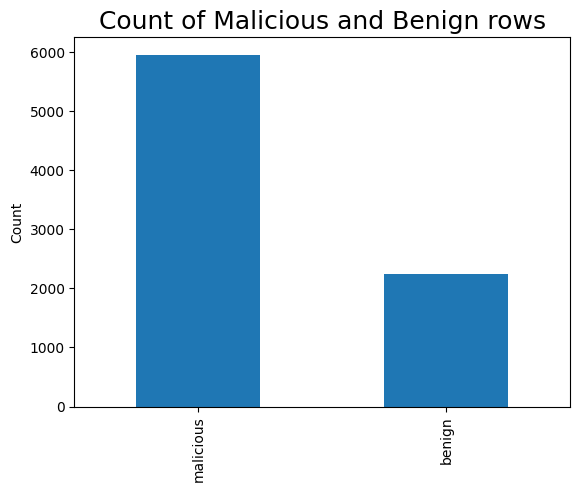

In [ ]:
# Assume "df_features" is your DataFrame object
classification_counts = df_without_pycaret['classification'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of Malicious and Benign rows", fontsize=18)
plt.ylabel("Count")

#### Resampling strategies for imbalanced datasets

In [ ]:
# Class count
count_class_0, count_class_1 = df_without_pycaret.classification.value_counts()

# Divide by class
df_class_0 = df_without_pycaret[df_without_pycaret['classification'] == 'malicious']
df_class_1 = df_without_pycaret[df_without_pycaret['classification'] == 'benign']

#### Random over-sampling

Random over-sampling:
malicious    5959
benign       5959
Name: classification, dtype: int64


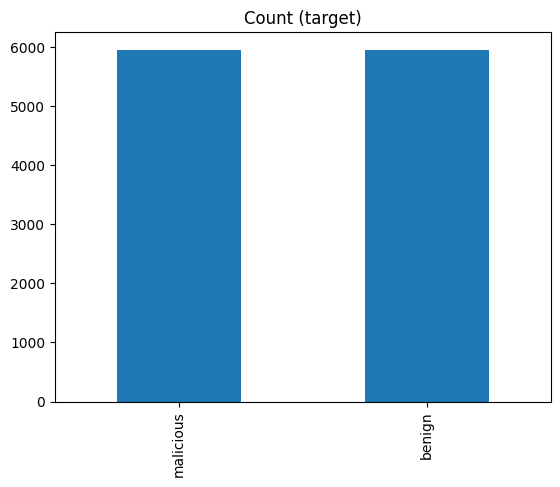

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.classification.value_counts())

df_test_over.classification.value_counts().plot(kind='bar', title='Count (target)');

### Convert non-numeric features to numeric

In [ ]:
# Convert classification to numeric (malicious = 1, benign = 0)
df_without_pycaret['classification'] = df_without_pycaret['classification'].map({'benign':0,'malicious':1})
df_without_pycaret.head()

title_clean  img_count  has_form  has_login_form  \
0                        one drive          1         0               0   
1                         no title          6         1               1   
2  email security : : user account          0         1               1   
3          sign in to your account          4         1               1   
4                      worldclient          2         1               1   

   has_js  js_include_b64  nb_tokens  \
0       1               0         31   
1       0               0          7   
2       1               0         19   
3       0               0         14   
4       1               0         13   

                                          text_clean  classification  \
0  one drive read document please choose email pr...               1   
1  gjin.jung samsung.com 3c 95338 2017 icp0803424...               1   
2  email security user account verification neede...               1   
3  sign account nobody mycraftmail.com enter pass...               1   
4  worldclient microsoft office verification port...               1   

   nb_title_entities  ...  webmail mini  webmail welcome  went wrong  \
0                0.0  ...             0                0           0   
1                0.0  ...             0                0           0   
2                0.0  ...             0                0           0   
3                0.0  ...             0                0           0   
4                0.0  ...             0                0           0   

   went wrong dont  would like  would like proceed  wrong dont  \
0                0           0                   0           0   
1                0           0                   0           0   
2                0           0                   0           0   
3                0           0                   0           0   
4                0           0                   0           0   

   wrong dont fret  yes something  yes something went  
0                0              0                   0  
1                0              0                   0  
2                0              0                   0  
3                0              0                   0  
4                0              0                   0  

[5 rows x 274 columns]

In [ ]:
df_without_pycaret = handle_non_numerical_data(df_without_pycaret)
print(df_without_pycaret.head())

   title_clean  img_count  has_form  has_login_form  has_js  js_include_b64  \
0            9          1         0               0       1               0   
1          414          6         1               1       0               0   
2          758          0         1               1       1               0   
3          341          4         1               1       0               0   
4         1005          2         1               1       1               0   

   nb_tokens  text_clean  classification  nb_title_entities  ...  \
0         31         488               1                0.0  ...   
1          7        2796               1                0.0  ...   
2         19        1985               1                0.0  ...   
3         14        1078               1                0.0  ...   
4         13        2669               1                0.0  ...   

   webmail mini  webmail welcome  went wrong  went wrong dont  would like  \
0             0                0       

### Classification with Random Forest

#### Hyperparameter tuning for Random Forest using GridSearchCV

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20,30,40,50],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

We determined from a previous hyperparameter tuning that the optimal number of trees to use is 30.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier model with 30 trees
t0 = time.time()
rf = RandomForestClassifier()
print("Training time:", time.time()-t0)

# Train the model
rf.fit(X_train, y_train)

# Predict Class Probabilities
y_rf_proba = rf.predict_proba(X_test)
y_rf_pred = np.where(y_rf_proba[:,1] > 0.5, 1, 0)

#Predict the classes for testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 0.00018858909606933594
Training Accuracy : 0.9817184643510055
Validation Accuracy : 0.9427178549664839


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [ ]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.944 (0.007)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.262 (0.076)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [ ]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.974 (0.006)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [ ]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.057 (0.006)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [ ]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.055 (0.006)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [ ]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.715 (0.033)


In [ ]:
run_svm(rf, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       440
           1       0.94      0.98      0.96      1201

    accuracy                           0.94      1641
   macro avg       0.94      0.91      0.92      1641
weighted avg       0.94      0.94      0.94      1641



Visualize individual decision tress from a random forest.

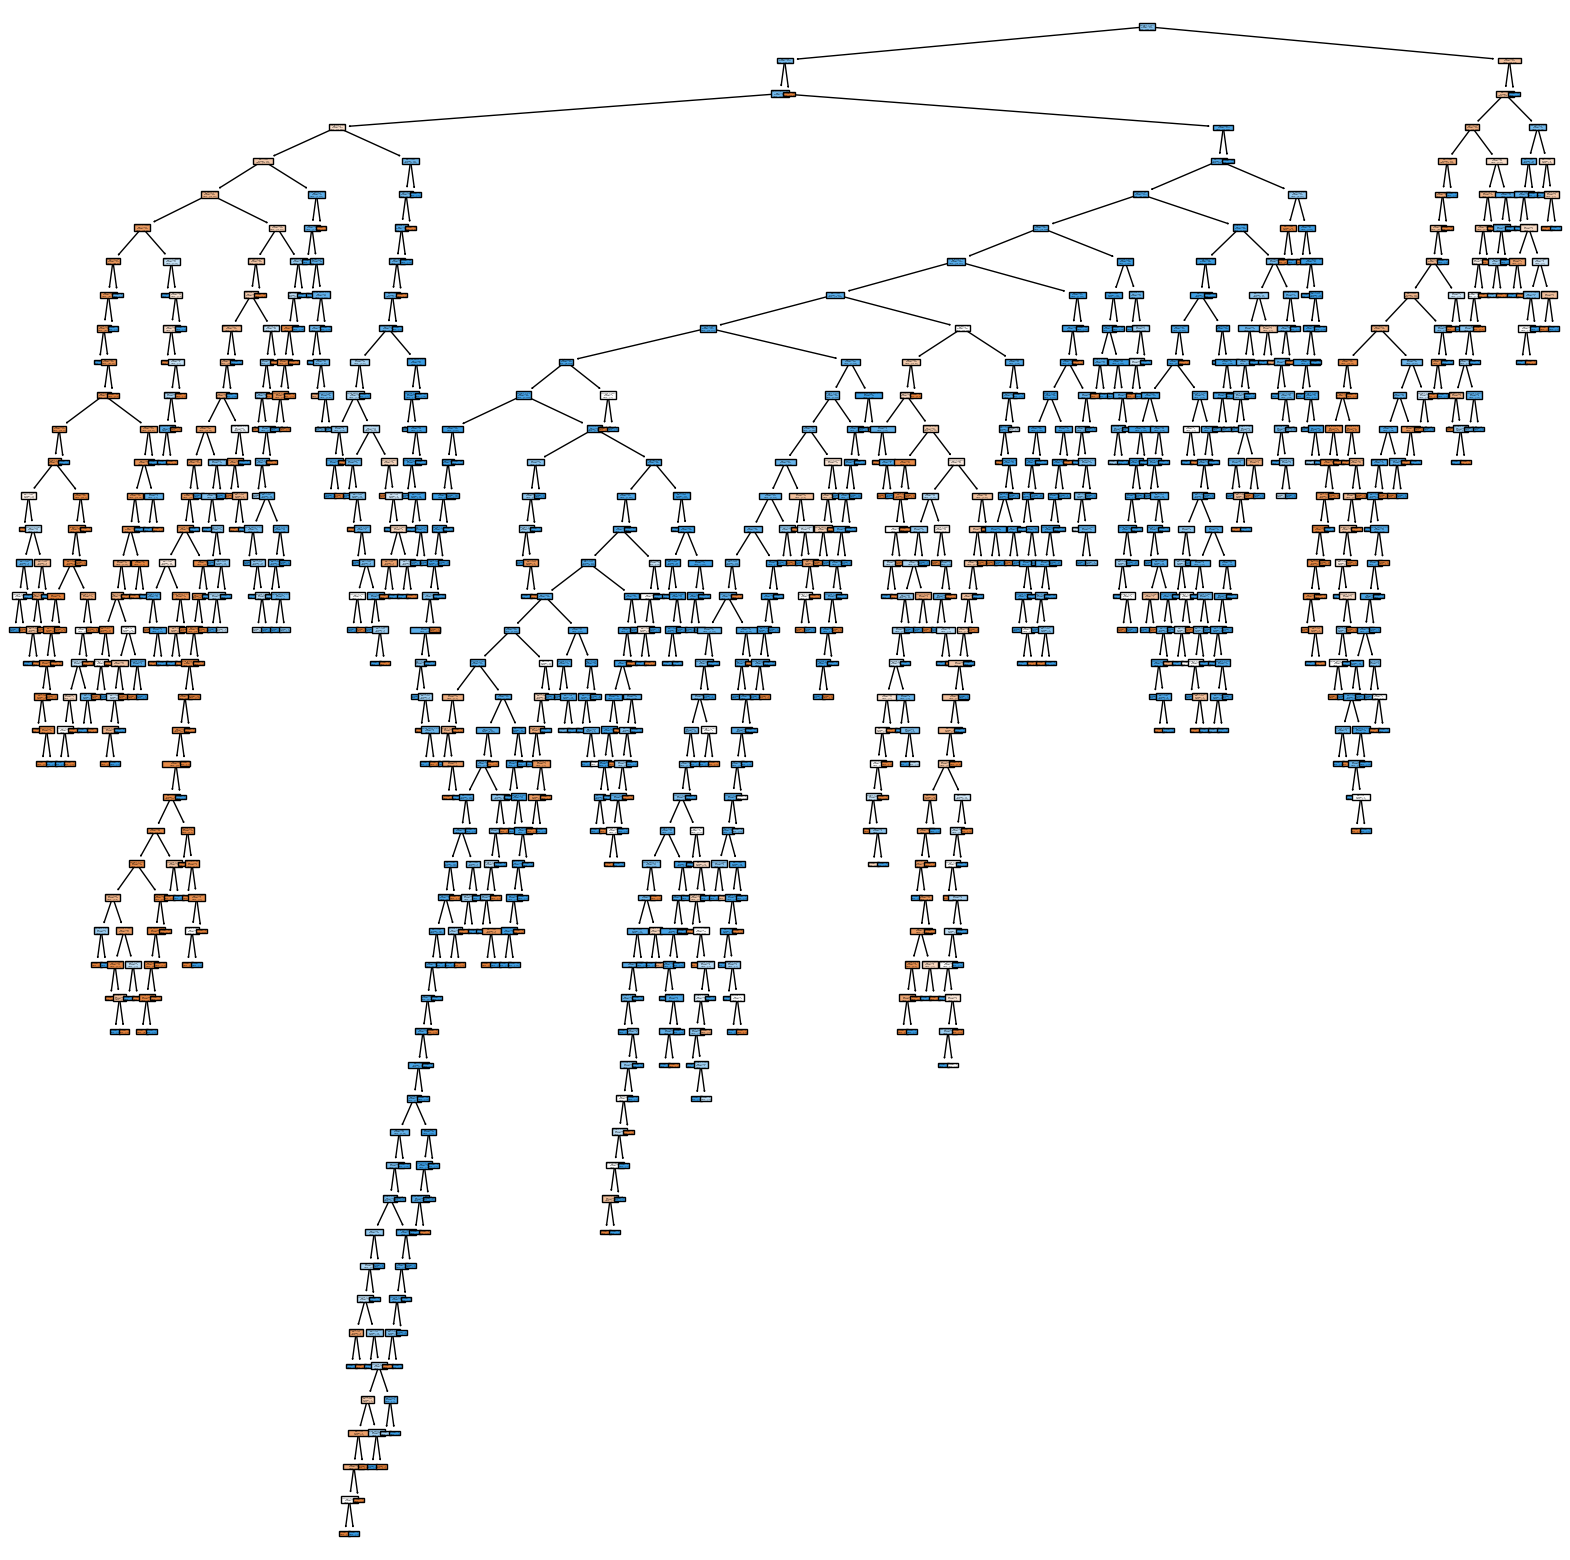

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

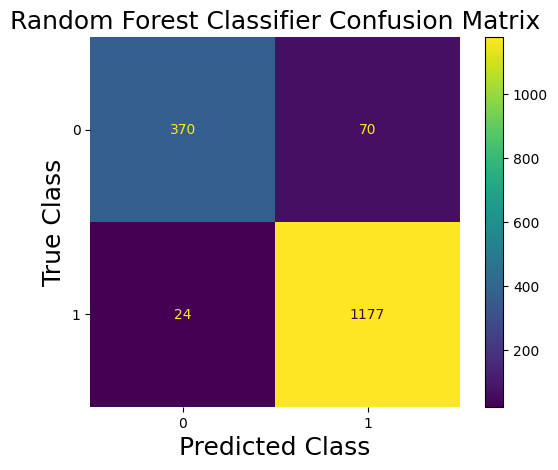

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

Summary of Feature Importance:
title_clean: Score: 0.06397
img_count: Score: 0.07662
has_form: Score: 0.02787
has_login_form: Score: 0.14219
has_js: Score: 0.00888
js_include_b64: Score: 0.00144
nb_tokens: Score: 0.08185
text_clean: Score: 0.07556
nb_title_entities: Score: 0.01058
nb_text_entities: Score: 0.02912
bank_of_america: Score: 0.00031
wells_fargo: Score: 0.00047
citibank: Score: 0.00000
apple: Score: 0.00171
microsoft: Score: 0.00813
amazon: Score: 0.00133
google: Score: 0.00212
facebook: Score: 0.00062
dhl: Score: 0.00000
youtube: Score: 0.00000
whatsapp: Score: 0.00002
linkedin: Score: 0.00047
twitter: Score: 0.00292
access account: Score: 0.00231
account account: Score: 0.00063
account account create: Score: 0.00021
account another: Score: 0.00004
account another account: Score: 0.00006
account create: Score: 0.00234
account create one: Score: 0.00158
account doe: Score: 0.00160
account doe n: Score: 0.00066
account enter: Score: 0.00052
account enter password: Score: 0.00

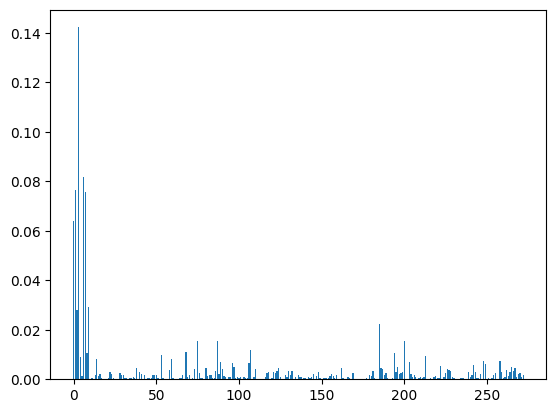

In [ ]:
# get importance
importance = rf.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(rf.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

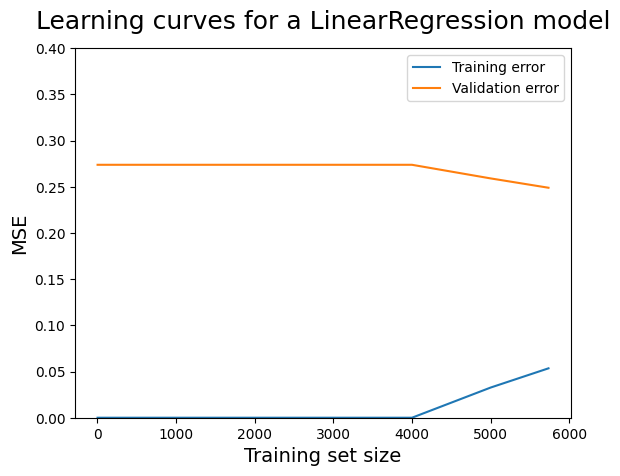

In [ ]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

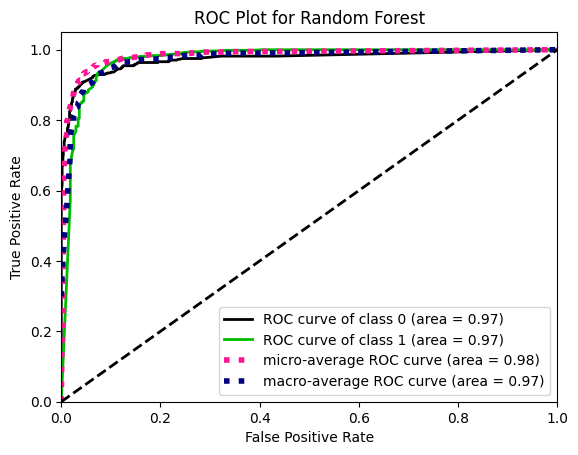

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_rf_proba, title = 'ROC Plot for Random Forest')

<Axes: title={'center': 'PR Curve for Random Forest'}, xlabel='Recall', ylabel='Precision'>

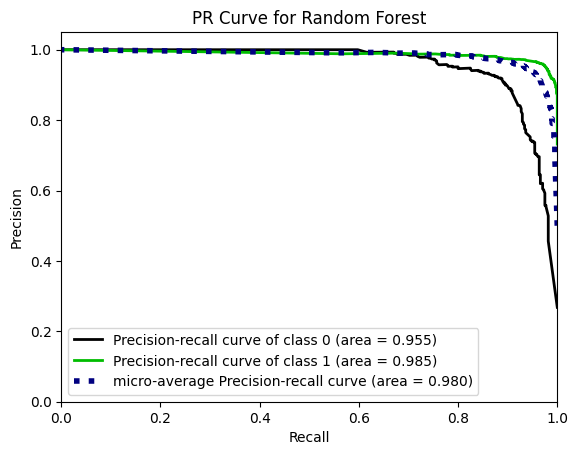

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_rf_proba, title = 'PR Curve for Random Forest')

<Axes: title={'center': 'Cumulative Gains Chart for Random Forest'}, xlabel='Percentage of sample', ylabel='Gain'>

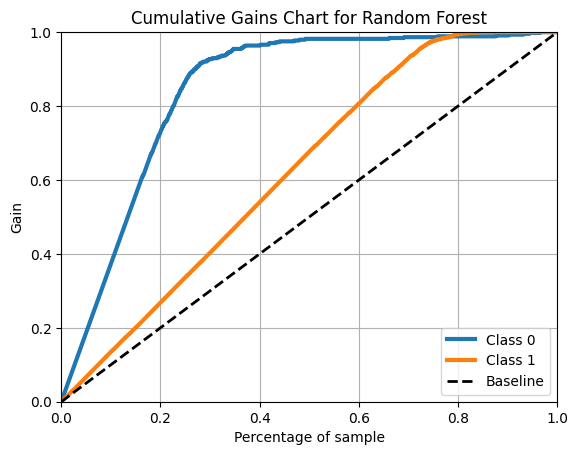

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_rf_proba, title = 'Cumulative Gains Chart for Random Forest')

<Axes: title={'center': 'Lift Curve for Random Forest'}, xlabel='Percentage of sample', ylabel='Lift'>

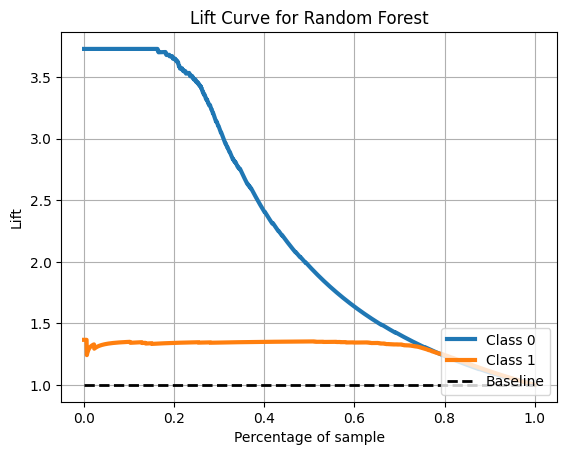

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_rf_proba, title = 'Lift Curve for Random Forest')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, rf.predict_proba(X_test))
logloss

0.2861112445932194

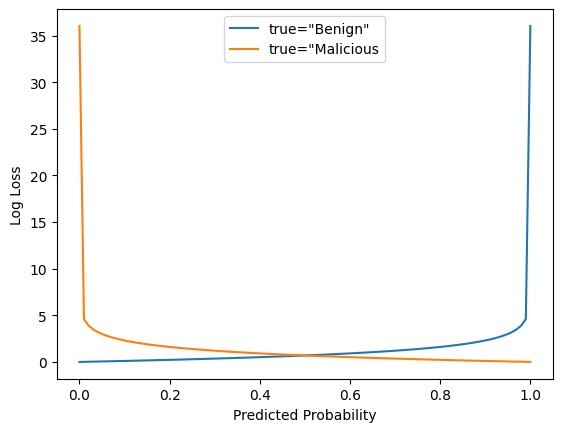

In [ ]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Classification with Extra Trees

#### Hyperparameter tuning for Random Forest using GridSearchCV

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier model
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20,30,40,50],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=et,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

ef_best = grid_search.best_estimator_
ef_best

We determined from a previous hyperparameter tuning that the optimal number of trees to use is 50.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier model with 50 trees
et = ExtraTreesClassifier()

# Train the model
t0 = time.time()
et.fit(X_train, y_train)
print("Training time:", time.time()-t0)

# Predict Class Probabilities
y_et_proba = et.predict_proba(X_test)
y_et_pred = np.where(y_et_proba[:,1] > 0.5, 1, 0)

#Predict the classes for testing data
y_pred = et.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", et.score(X_train, y_train))
print("Validation Accuracy :", et.score(X_test, y_test))

Training time: 0.897397518157959
Training Accuracy : 0.9817184643510055
Validation Accuracy : 0.9427178549664839


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [ ]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.943 (0.006)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.528 (0.112)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [ ]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.969 (0.007)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [ ]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.057 (0.006)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [ ]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.057 (0.006)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [ ]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.713 (0.033)


In [ ]:
run_svm(et, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       440
           1       0.95      0.97      0.96      1201

    accuracy                           0.94      1641
   macro avg       0.94      0.92      0.93      1641
weighted avg       0.94      0.94      0.94      1641



Visualize individual decision tress from extra trees.

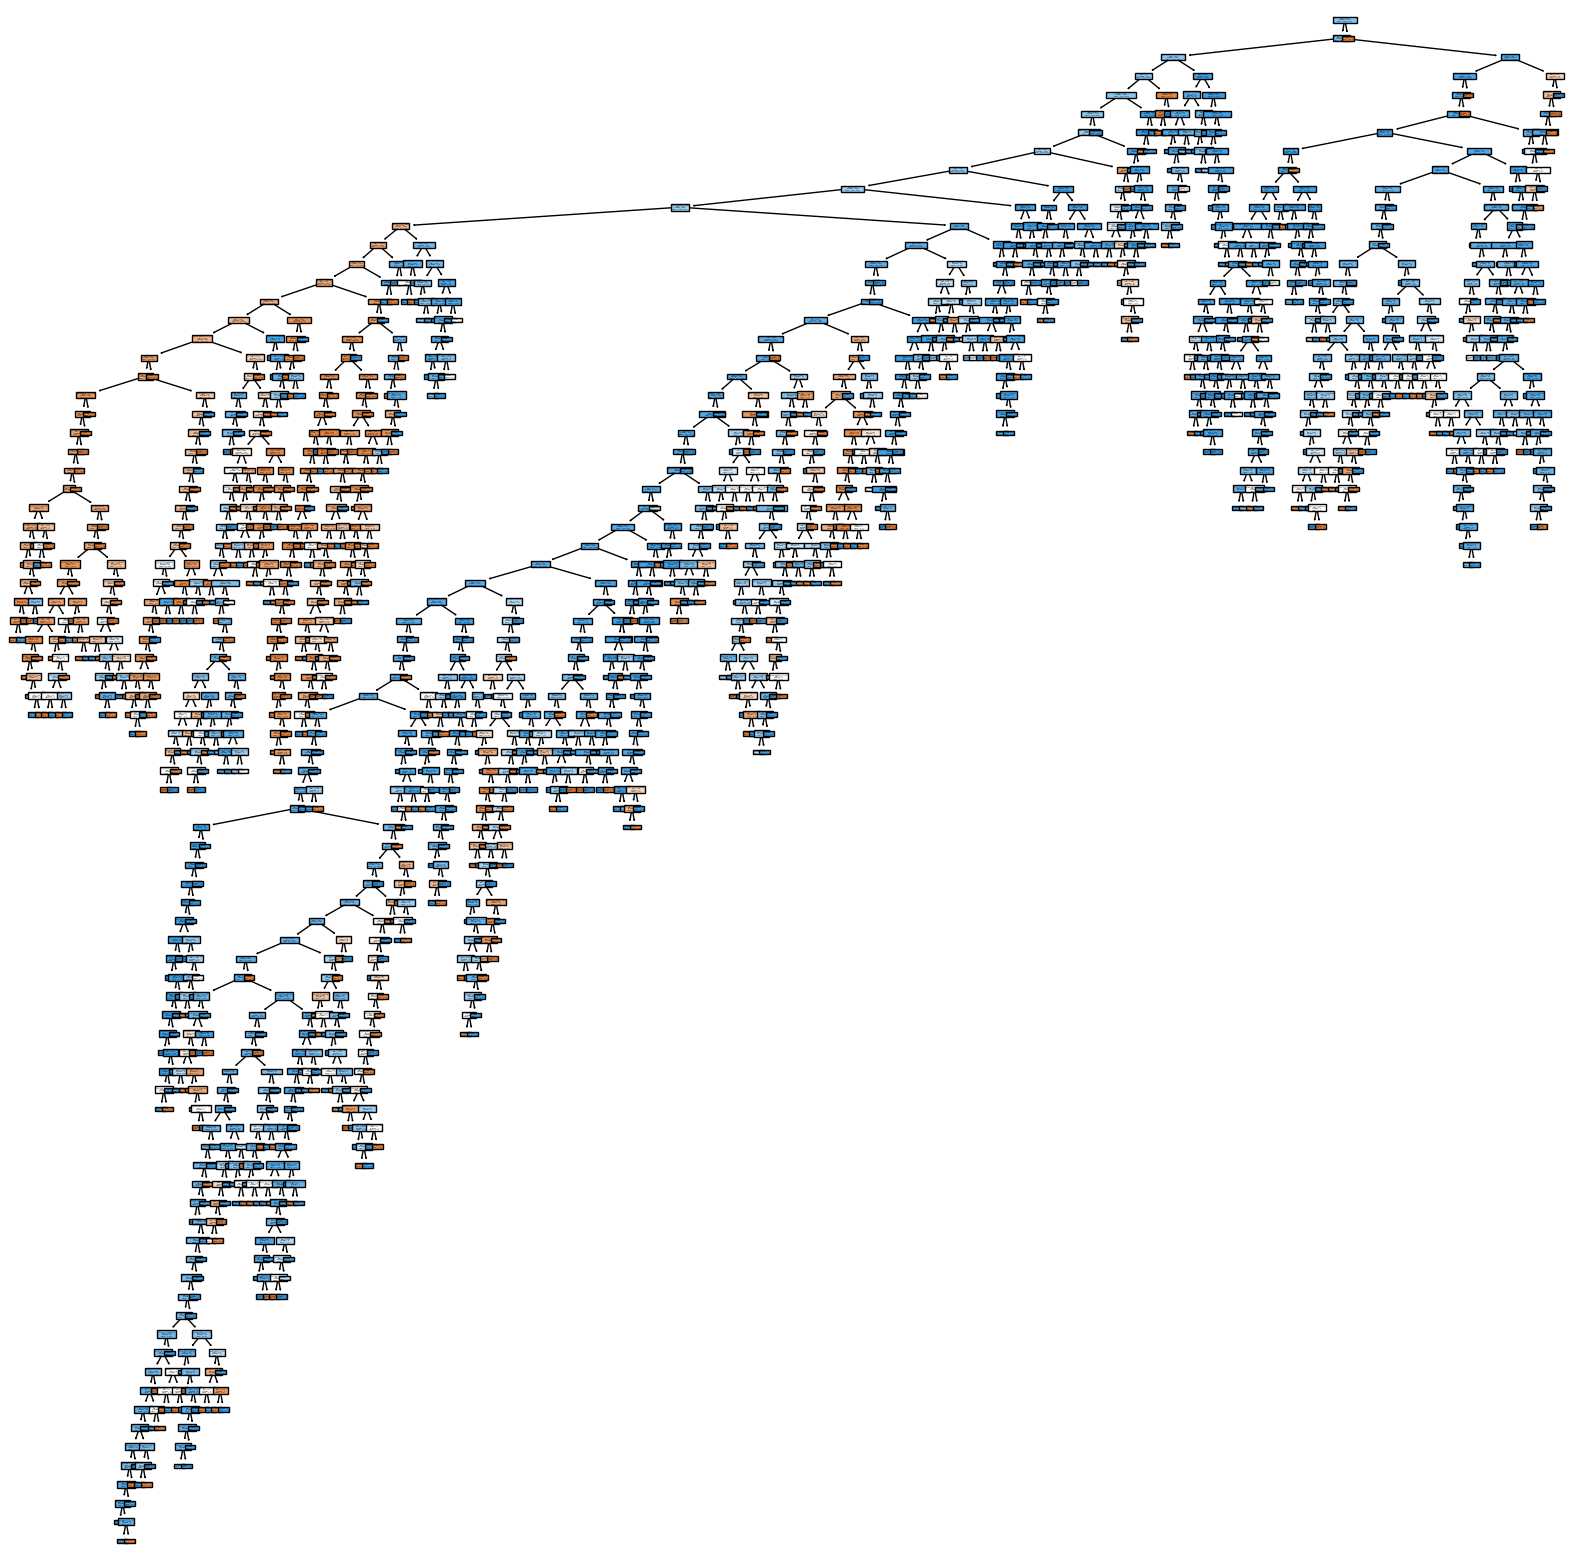

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(et.estimators_[0], feature_names=X.columns, filled=True)

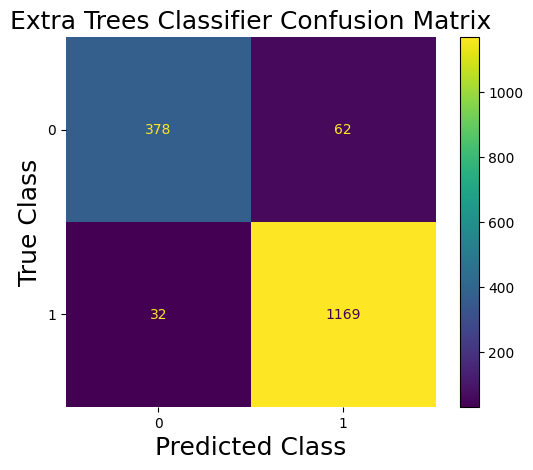

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Extra Trees Classifier Confusion Matrix', fontsize=18)
plt.show()

Summary of Feature Importance:
title_clean: Score: 0.04449
img_count: Score: 0.03171
has_form: Score: 0.04190
has_login_form: Score: 0.15384
has_js: Score: 0.01249
js_include_b64: Score: 0.00147
nb_tokens: Score: 0.04744
text_clean: Score: 0.05920
nb_title_entities: Score: 0.01270
nb_text_entities: Score: 0.02488
bank_of_america: Score: 0.00032
wells_fargo: Score: 0.00082
citibank: Score: 0.00000
apple: Score: 0.00322
microsoft: Score: 0.01285
amazon: Score: 0.00167
google: Score: 0.00524
facebook: Score: 0.00046
dhl: Score: 0.00000
youtube: Score: 0.00000
whatsapp: Score: 0.00002
linkedin: Score: 0.00021
twitter: Score: 0.00191
access account: Score: 0.00316
account account: Score: 0.00063
account account create: Score: 0.00029
account another: Score: 0.00001
account another account: Score: 0.00053
account create: Score: 0.00420
account create one: Score: 0.00152
account doe: Score: 0.00085
account doe n: Score: 0.00211
account enter: Score: 0.00087
account enter password: Score: 0.00

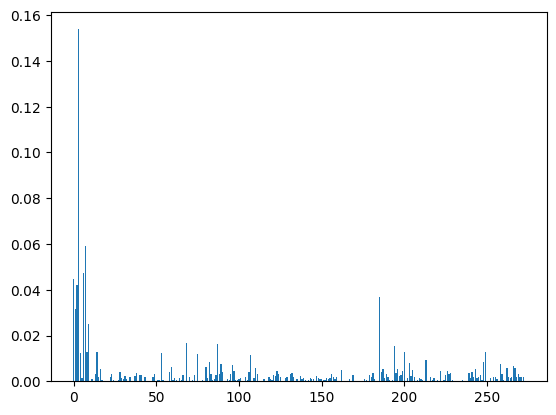

In [ ]:
# get importance
importance = et.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(et.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

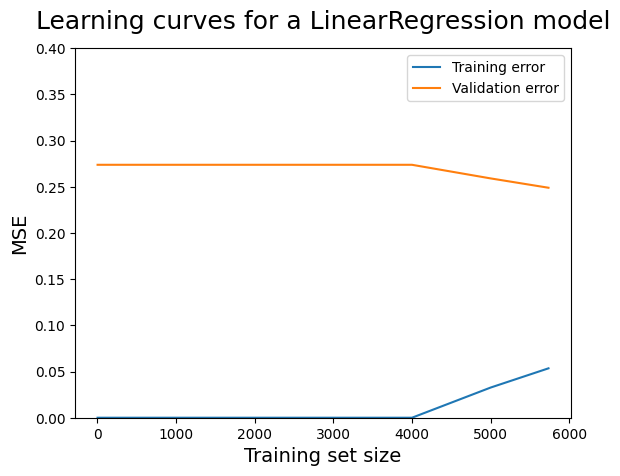

In [ ]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Extra Trees'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

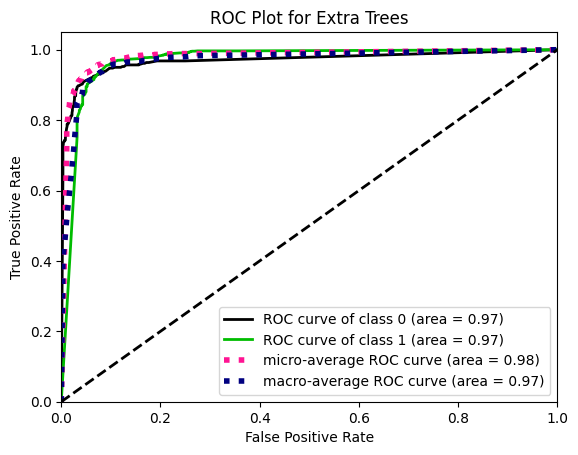

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_et_proba, title = 'ROC Plot for Extra Trees')

<Axes: title={'center': 'PR Curve for Extra Trees'}, xlabel='Recall', ylabel='Precision'>

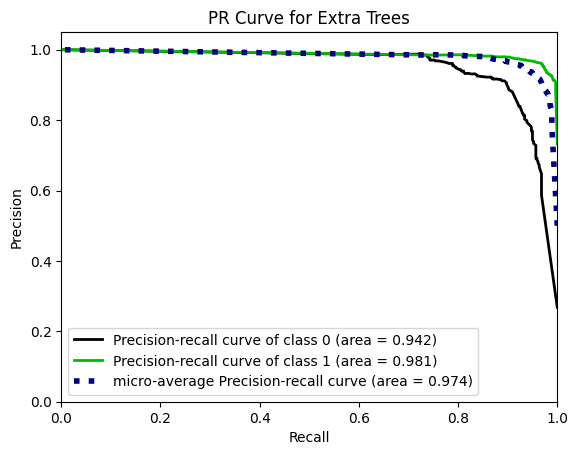

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_et_proba, title = 'PR Curve for Extra Trees')

<Axes: title={'center': 'Cumulative Gains Chart for Extra Trees'}, xlabel='Percentage of sample', ylabel='Gain'>

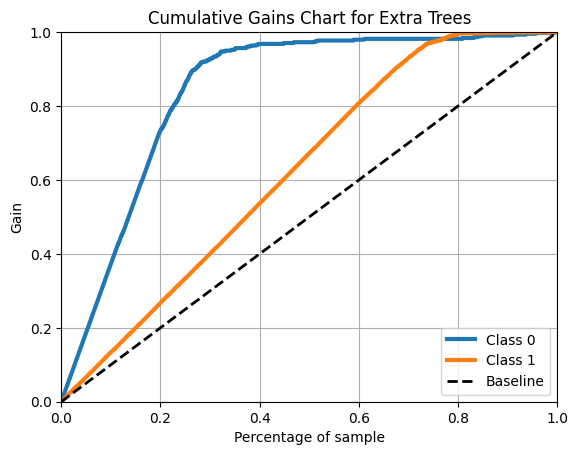

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_et_proba, title = 'Cumulative Gains Chart for Extra Trees')

<Axes: title={'center': 'Lift Curve for Extra Trees'}, xlabel='Percentage of sample', ylabel='Lift'>

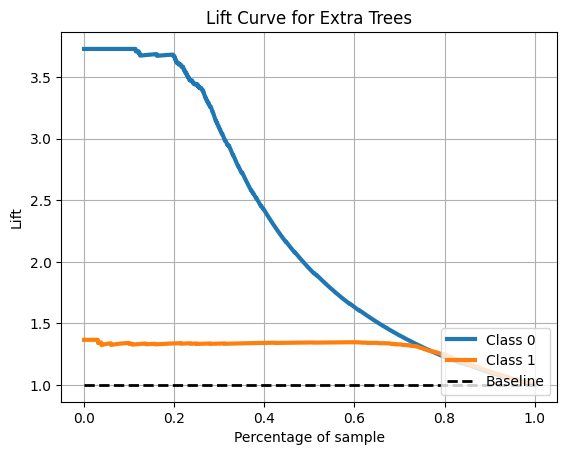

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_et_proba, title = 'Lift Curve for Extra Trees')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, et.predict_proba(X_test))
logloss

0.4977327513792858

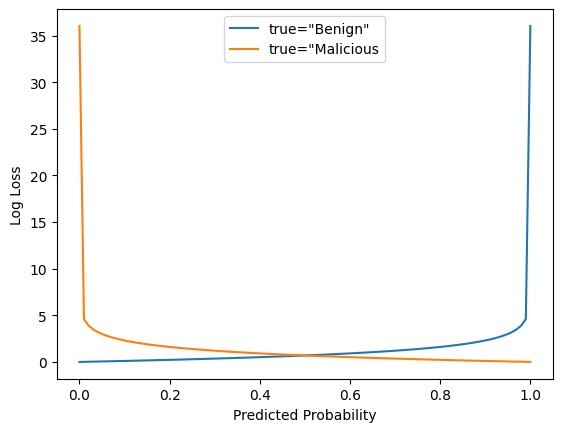

In [ ]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Classification with K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a KNeighborsClassifier model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
t0 = time.time()
knn.fit(X_train, y_train)
print("Training time:", time.time()-t0)

#Predict the classes for testing data
y_pred = knn.predict(X_test)

# Predict Class Probabilities
y_knn_proba = knn.predict_proba(X_test)
y_knn_pred = np.where(y_knn_proba[:,1] > 0.5, 1, 0)

# Evaluate the model's performance
print("Training Accuracy :", knn.score(X_train, y_train))
print("Validation Accuracy :", knn.score(X_test, y_test))

Training time: 0.018816709518432617


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f6529dbfee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


Training Accuracy : 0.907830591102986
Validation Accuracy : 0.8555758683729433


Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [ ]:
# Cross Validation Classification Accuracy
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.860 (0.011)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
# Cross Validation Classification LogLoss
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_log_loss'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -2.541 (0.393)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [ ]:
# Cross Validation Classification ROC AUC
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'roc_auc'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.855 (0.017)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [ ]:
# Cross Validation Regression MAE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.140 (0.011)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [ ]:
# Cross Validation Regression MSE
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.140 (0.011)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [ ]:
# Cross Validation Regression R^2
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.296 (0.061)


In [ ]:
run_svm(knn, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       440
           1       0.88      0.93      0.90      1201

    accuracy                           0.86      1641
   macro avg       0.82      0.79      0.81      1641
weighted avg       0.85      0.86      0.85      1641



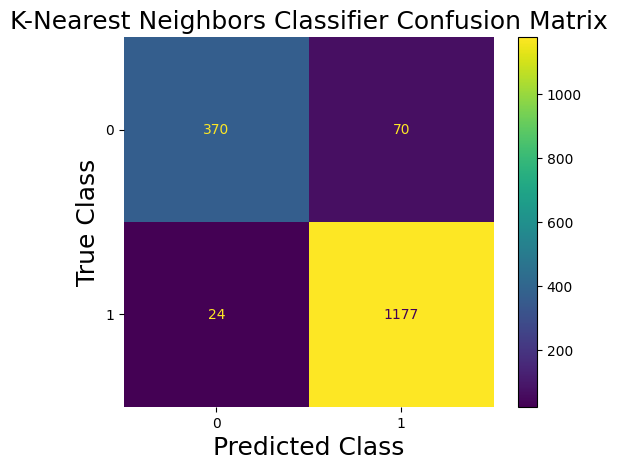

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('K-Nearest Neighbors Classifier Confusion Matrix', fontsize=18)
plt.show()

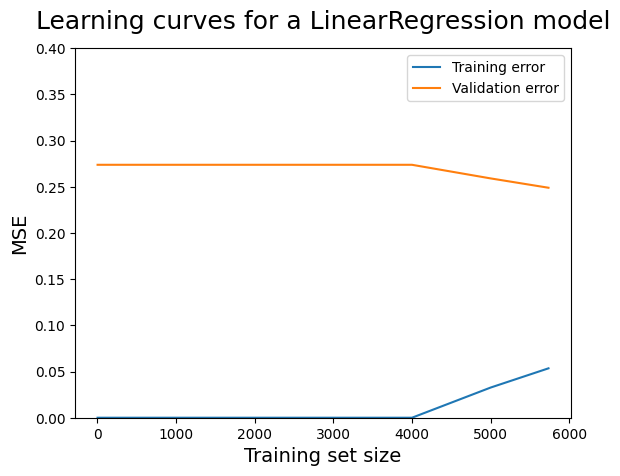

In [ ]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for K-Nearest Neighbors'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

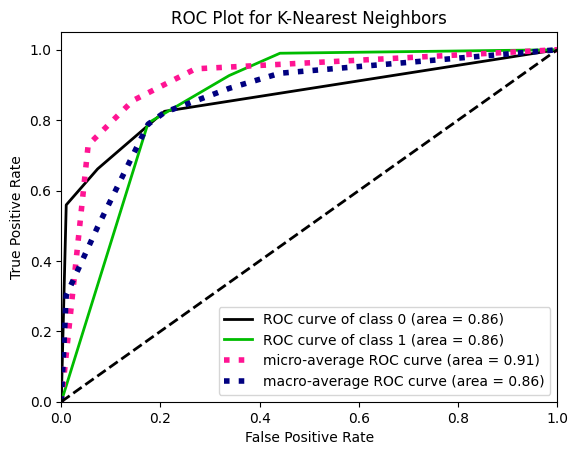

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_knn_proba, title = 'ROC Plot for K-Nearest Neighbors')

<Axes: title={'center': 'PR Curve for K-Nearest Neighbors'}, xlabel='Recall', ylabel='Precision'>

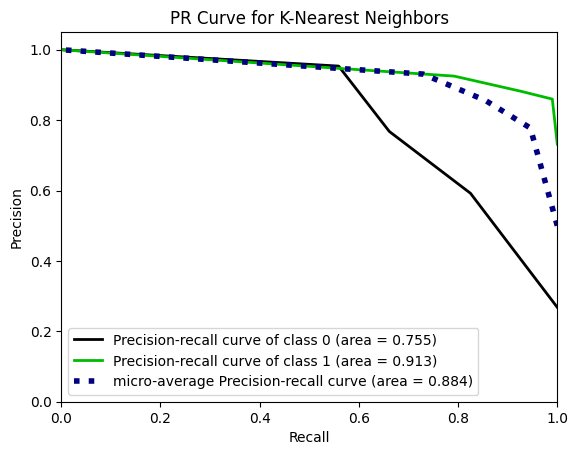

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_knn_proba, title = 'PR Curve for K-Nearest Neighbors')

<Axes: title={'center': 'Cumulative Gains Chart for K-Nearest Neighbors'}, xlabel='Percentage of sample', ylabel='Gain'>

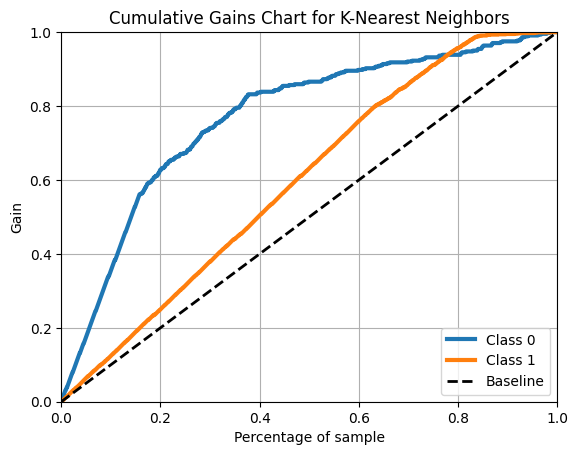

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_knn_proba, title = 'Cumulative Gains Chart for K-Nearest Neighbors')

<Axes: title={'center': 'Lift Curve for K-Nearest Neighbors'}, xlabel='Percentage of sample', ylabel='Lift'>

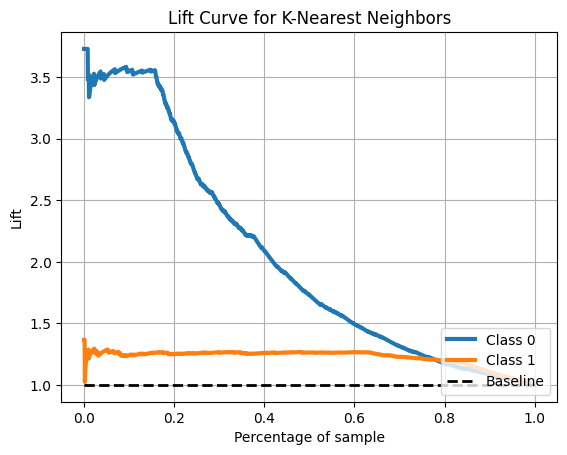

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_knn_proba, title = 'Lift Curve for K-Nearest Neighbors')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, knn.predict_proba(X_test))
logloss

2.1050646238468596

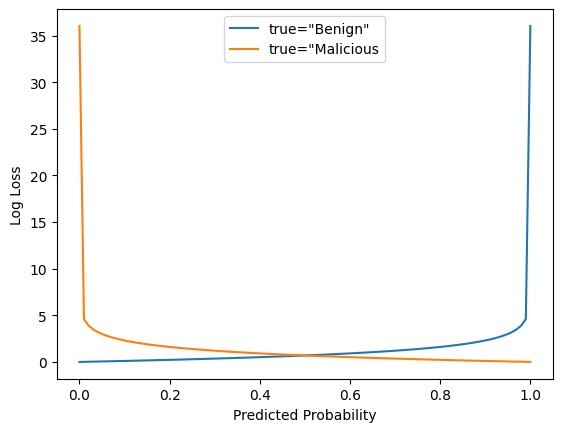

In [ ]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Summary of Classification without PyCaret

<Axes: title={'center': 'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

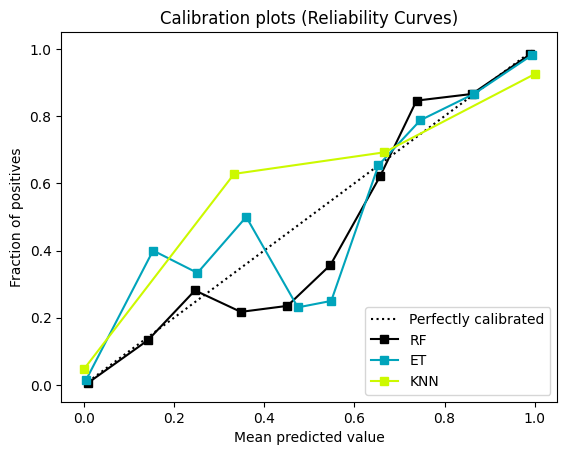

In [ ]:
probas_list = [y_rf_proba, y_et_proba, y_knn_proba]
clf_names = ['RF', 'ET', 'KNN']
skplt.metrics.plot_calibration_curve(y_test, probas_list = probas_list, clf_names = clf_names)

## Classification with PyCaret

In [ ]:
# Make a copy of the dataset
df_with_pycaret = df.copy()

In [ ]:
df_with_pycaret.describe()

img_count     has_form  has_login_form       has_js  js_include_b64  \
count  8205.000000  8205.000000     8205.000000  8205.000000     8205.000000   
mean      3.201463     0.756734        0.721389     0.834369        0.007678   
std       6.600718     0.429081        0.448343     0.371771        0.087294   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       1.000000     1.000000        0.000000     1.000000        0.000000   
50%       2.000000     1.000000        1.000000     1.000000        0.000000   
75%       4.000000     1.000000        1.000000     1.000000        0.000000   
max     230.000000     1.000000        1.000000     1.000000        1.000000   

         nb_tokens  nb_title_entities  nb_text_entities  bank_of_america  \
count  8205.000000        8205.000000       8205.000000      8205.000000   
mean     24.931993           0.153077          1.323949         0.001341   
std      15.339852           0.368119          1.368347         0.036593   
min       7.000000           0.000000          0.000000         0.000000   
25%      12.000000           0.000000          0.000000         0.000000   
50%      21.000000           0.000000          1.000000         0.000000   
75%      33.000000           0.000000          2.000000         0.000000   
max      70.000000           2.000000         15.000000         1.000000   

       wells_fargo  ...  webmail mini  webmail welcome   went wrong  \
count  8205.000000  ...   8205.000000      8205.000000  8205.000000   
mean      0.000731  ...      0.041194         0.026082     0.029250   
std       0.027034  ...      0.198752         0.160910     0.168518   
min       0.000000  ...      0.000000         0.000000     0.000000   
25%       0.000000  ...      0.000000         0.000000     0.000000   
50%       0.000000  ...      0.000000         0.000000     0.000000   
75%       0.000000  ...      0.000000         0.000000     0.000000   
max       1.000000  ...      1.000000         2.000000     1.000000   

       went wrong dont   would like  would like proceed   wrong dont  \
count      8205.000000  8205.000000         8205.000000  8205.000000   
mean          0.027910     0.029250            0.027910     0.027910   
std           0.164724     0.168518            0.164724     0.164724   
min           0.000000     0.000000            0.000000     0.000000   
25%           0.000000     0.000000            0.000000     0.000000   
50%           0.000000     0.000000            0.000000     0.000000   
75%           0.000000     0.000000            0.000000     0.000000   
max           1.000000     1.000000            1.000000     1.000000   

       wrong dont fret  yes something  yes something went  
count      8205.000000    8205.000000         8205.000000  
mean          0.027910       0.027910            0.027910  
std           0.164724       0.164724            0.164724  
min           0.000000       0.000000            0.000000  
25%           0.000000       0.000000            0.000000  
50%           0.000000       0.000000            0.000000  
75%           0.000000       0.000000            0.000000  
max           1.000000       1.000000            1.000000  

[8 rows x 271 columns]

### Model Generation

With the `DataFrame` containing all the features generated, we use to generate a model to match the label defined in the `classification` column.

In [ ]:
#@title Classifier Options
sid = 1337 #@param {type:"integer"}
training_size = 0.85 #@param { type:"number" }

To avoid generating the "Numba needs NumPy 1.20 or less" exception, we ensure the numba package is upgraded before doing anything else.

In [ ]:
%%capture
!pip install numba --upgrade

#### Create the Classifier

We can then generate our classifier object using the following options:
* `transformation`.
* `normalize`.
* `fix_imbalance`. Since we have more sites labeled as malicious, we ask `pycaret` to consider potential sample imbalances.
* `remove_multicollinearity`. Remove features with the inter-correlations higher than the defined threshold of 0.95.

In [ ]:
from pycaret.classification import *

# Create a PyCaret Classification experiment
s = setup(data=df_with_pycaret,
          session_id=sid,
          transformation=True, #applies the power transform to make data more Gaussian-like
          normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
          fix_imbalance=True, # SMOTE (Synthetic Minority Over-sampling Technique) is applied to create synthetic datapoints for minority class.
          remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
          multicollinearity_threshold = 0.95,
          train_size=training_size,
          target="classification"
          )

#### Select Model

In [ ]:
# Compare multiple models and select the best
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

During the comparison, the top 2 classifier identified by `pycaret` are the _rf_ and _et_ classifiers. The _rf_ classifier reached an accuracy of 94.6%, a recall of 97.5% and precision of 95.2%. The _et_ classifier obtained 94.4% accuracy, a 97.3% recall but has a precision rate at 95.2%. The _rf_ and the _et_ classifier have very similar scores therefore further investigation is required to select one.

#### Random Forest Classifier

In [ ]:
#evaluate_model(m_rf)

In [ ]:
m_rf = create_model("rf")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

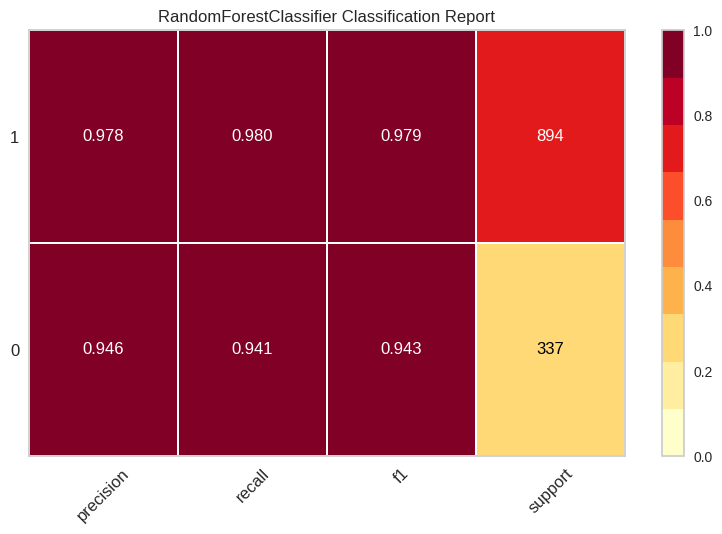

In [ ]:
plot_model(m_rf, plot = 'class_report')

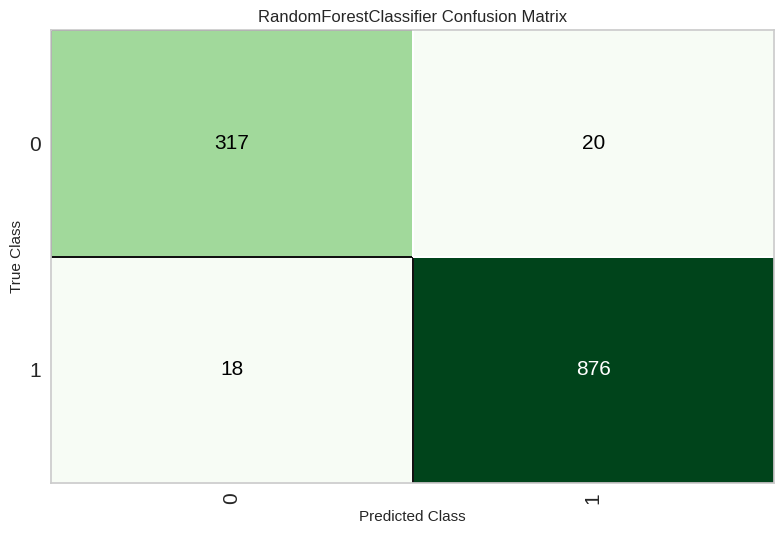

In [ ]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix')

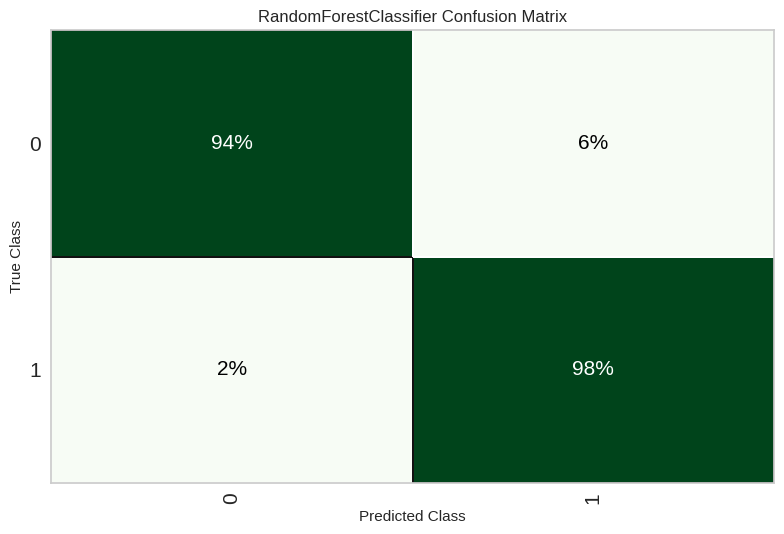

In [ ]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

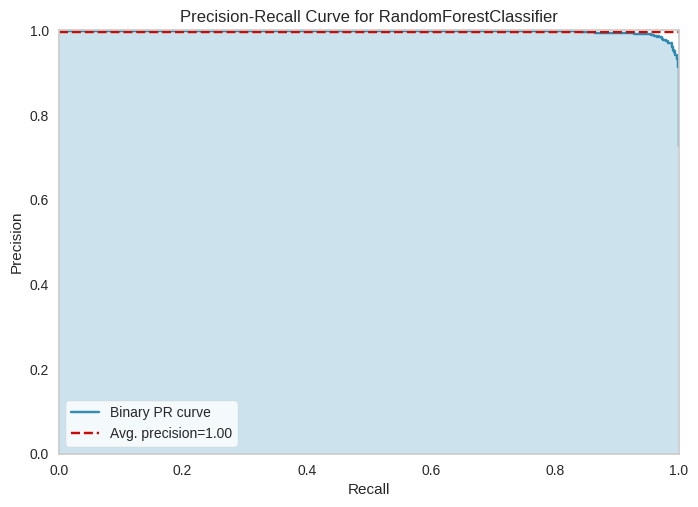

In [ ]:
plot_model(m_rf, plot = 'pr')

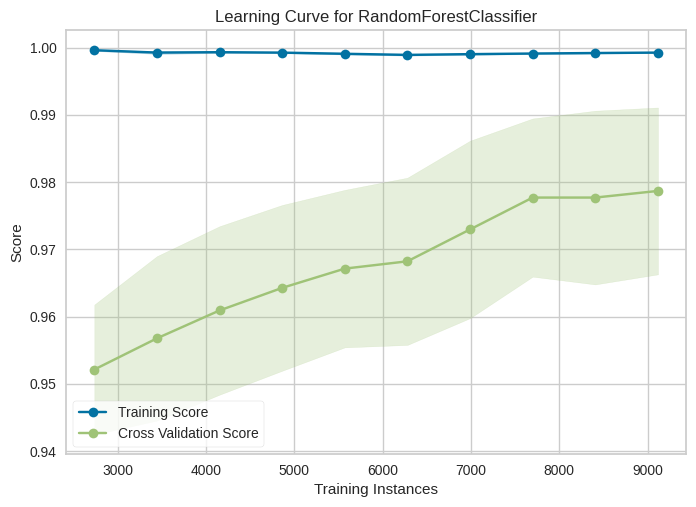

In [ ]:
plot_model(m_rf, plot = 'learning')

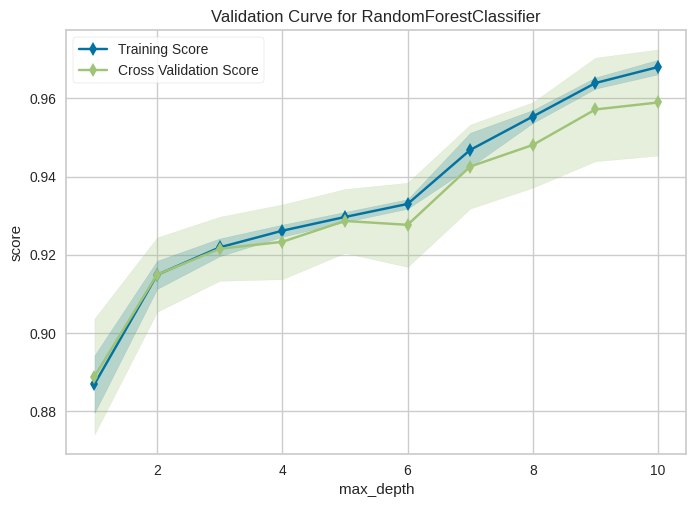

In [ ]:
plot_model(m_rf, plot = 'vc')

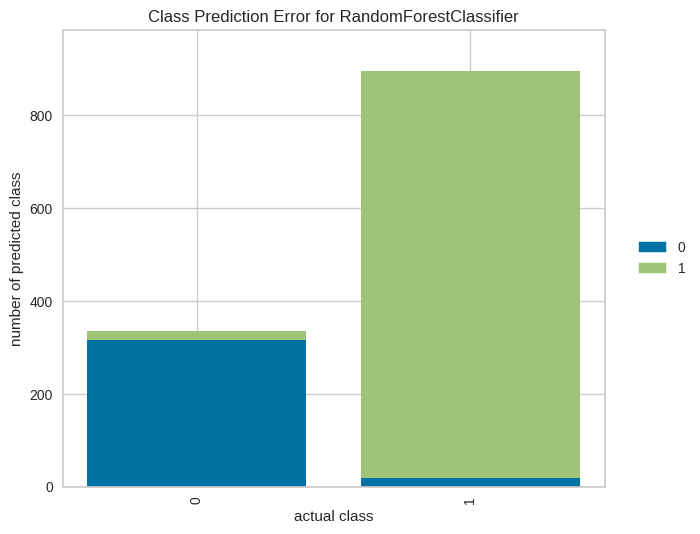

In [ ]:
# plot error
plot_model(m_rf, plot = 'error')

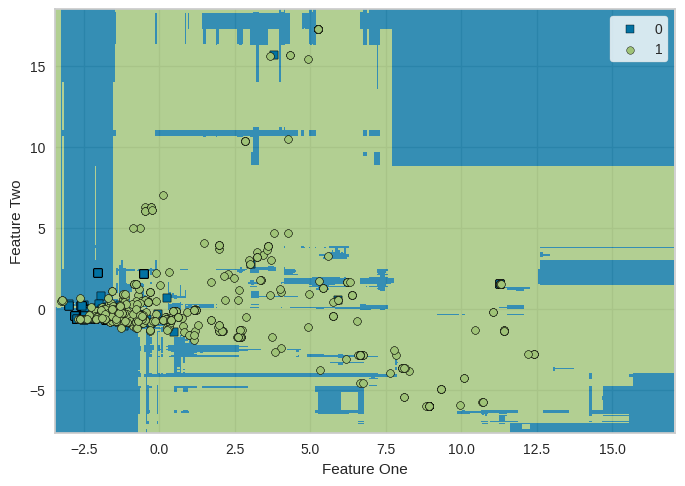

In [ ]:
# plot boundary
plot_model(m_rf, plot = 'boundary', use_train_data = True)

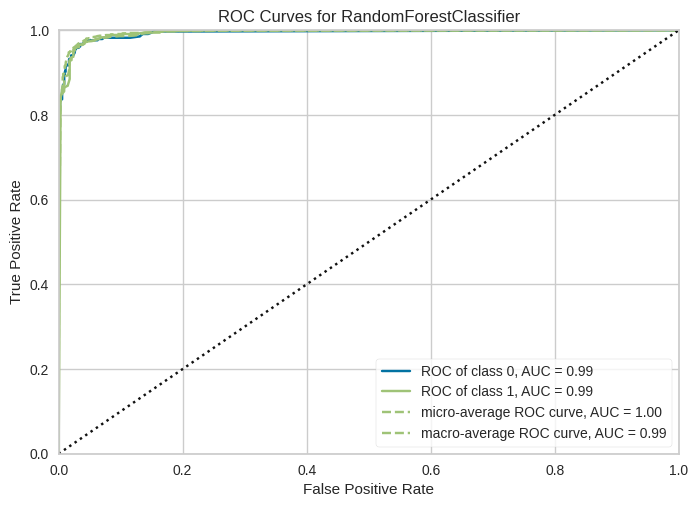

In [ ]:
# plot AUC
plot_model(m_rf, plot = 'auc')

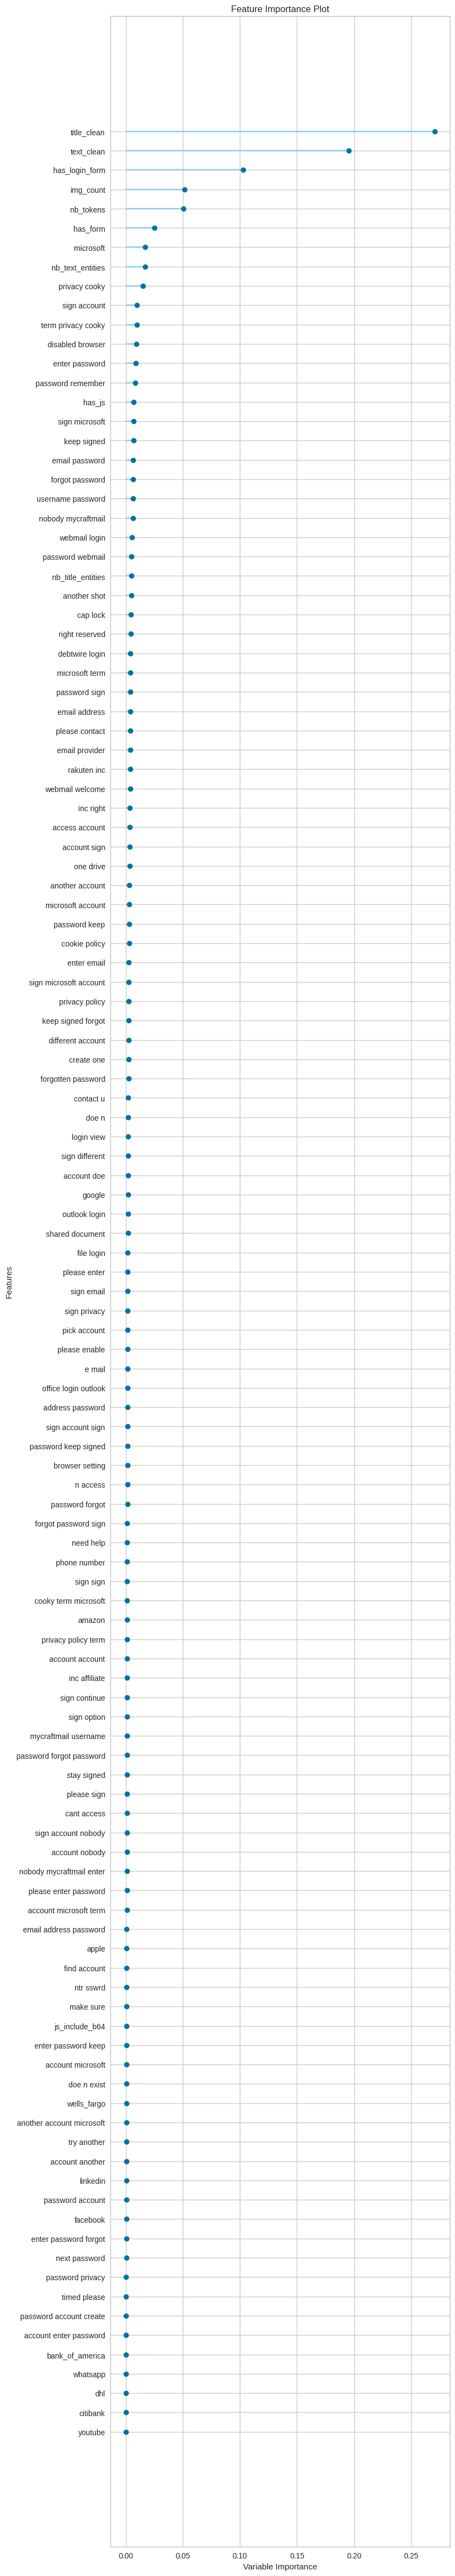

In [ ]:
# plot feature importance all
plot_model(m_rf, plot = 'feature_all')

#### Extra Trees Classifier

In [ ]:
#evaluate_model(m_et)

In [ ]:
m_et = create_model("et")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

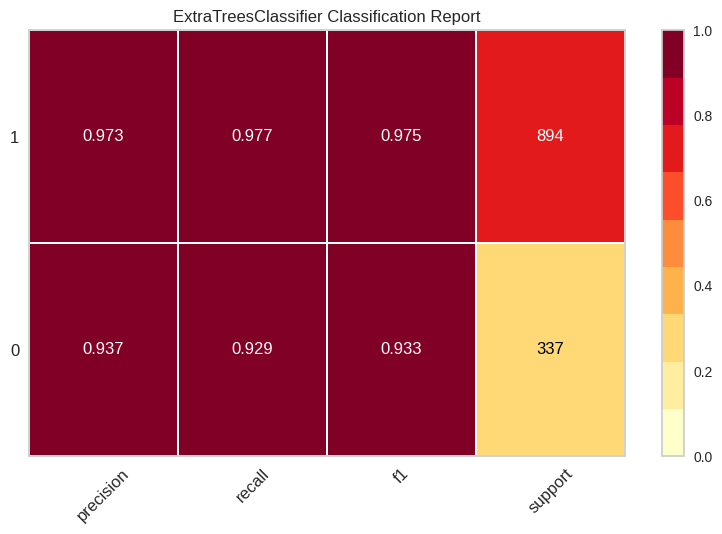

In [ ]:
plot_model(m_et, plot = 'class_report')

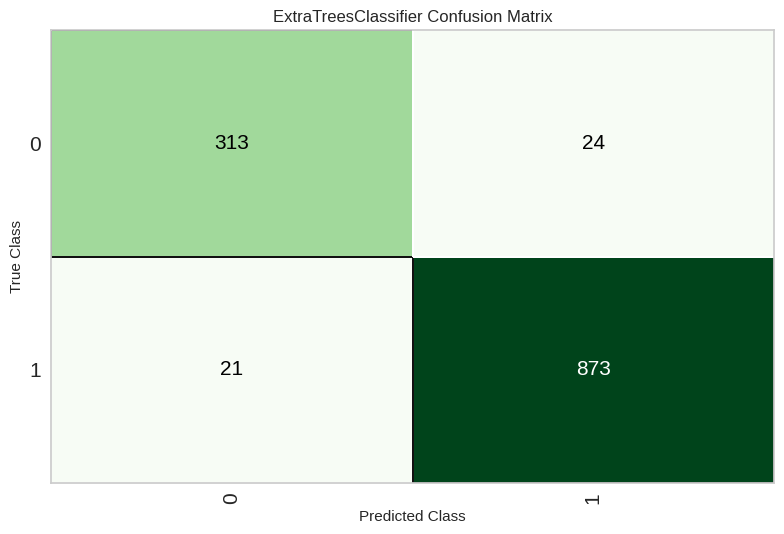

In [ ]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix')

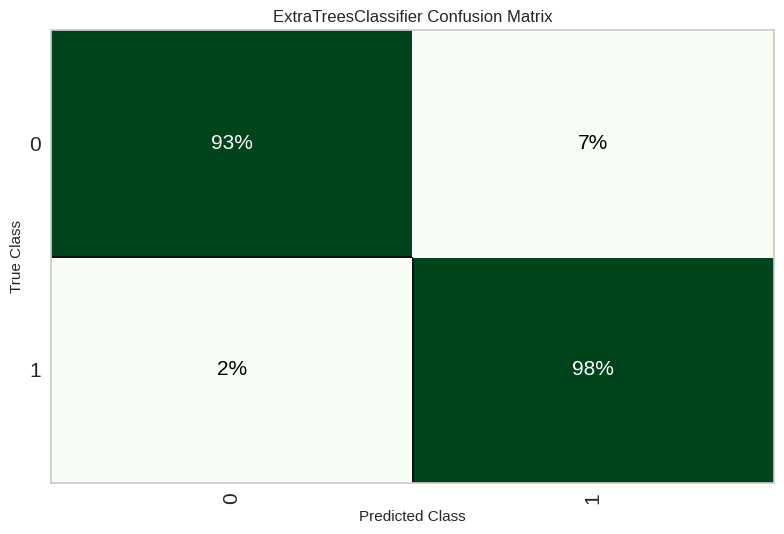

In [ ]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

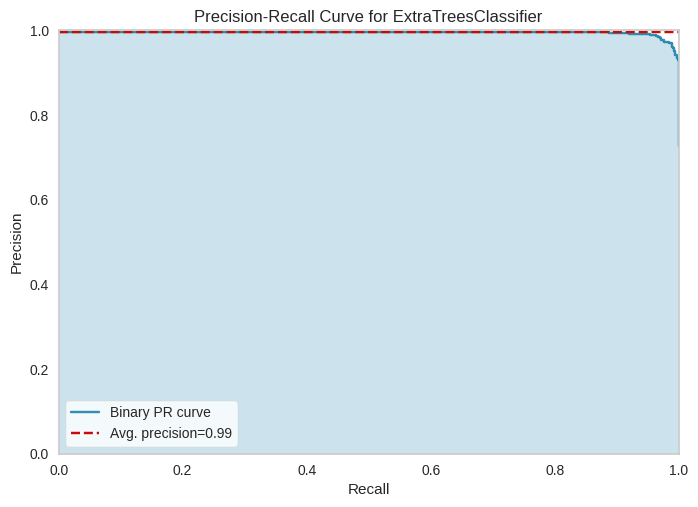

In [ ]:
plot_model(m_et, plot = 'pr')

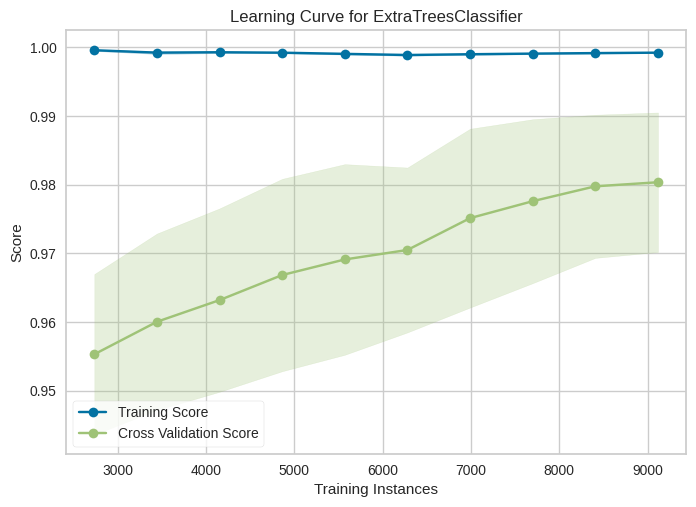

In [ ]:
plot_model(m_et, plot = 'learning')

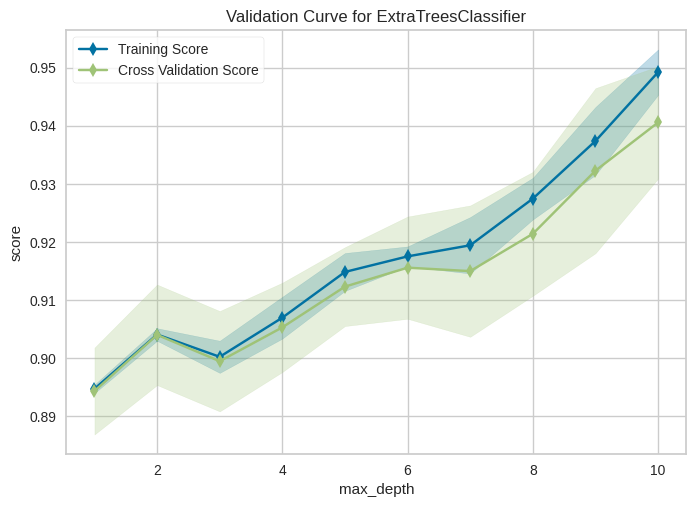

In [ ]:
plot_model(m_et, plot = 'vc')

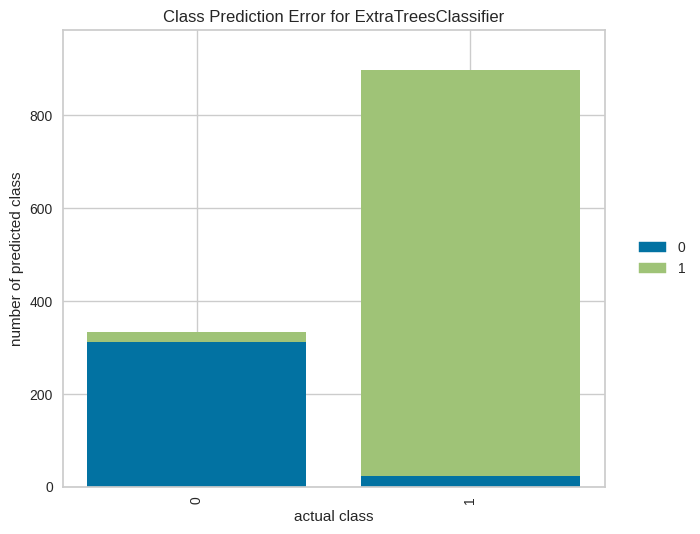

In [ ]:
# plot error
plot_model(m_et, plot = 'error')

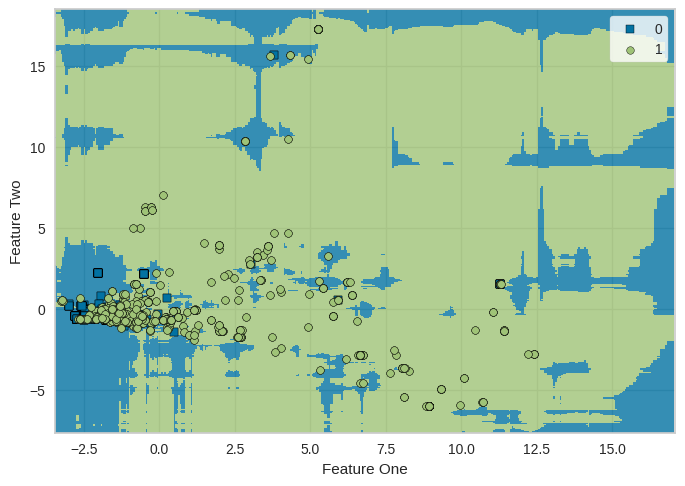

In [ ]:
# plot boundary
plot_model(m_et, plot = 'boundary', use_train_data = True)

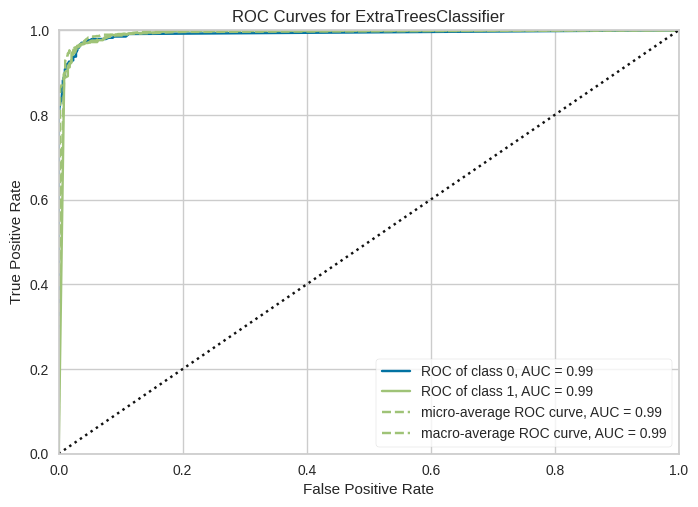

In [ ]:
# plot AUC
plot_model(m_et, plot = 'auc')

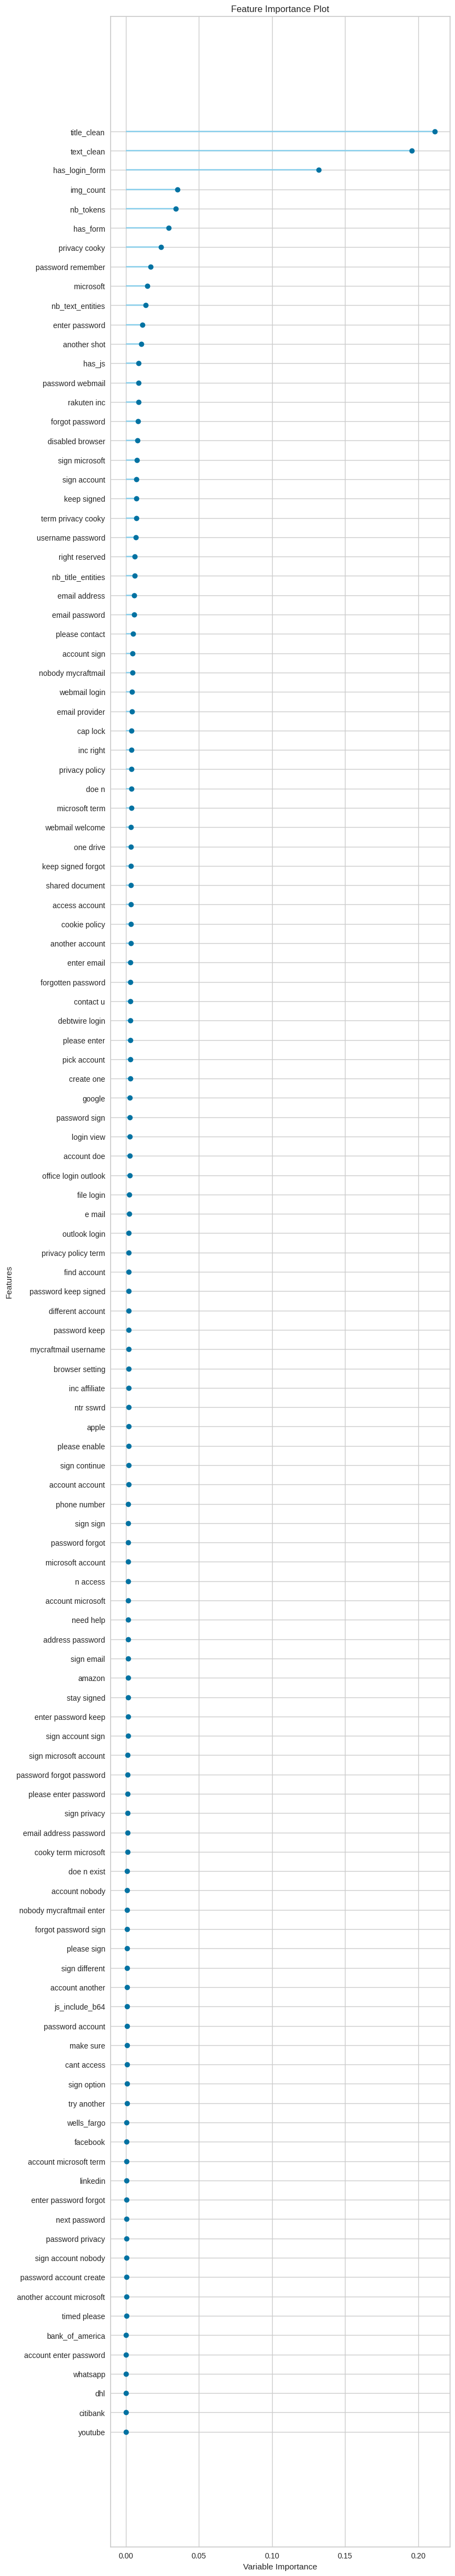

In [ ]:
# plot feature importance all
plot_model(m_et, plot = 'feature_all')

### Finalize Model

Some of the key observations made by comparing the _rf_ and _et_ models are enumerated here:
* **Accuracy** is the percentage of correct classifications that a trained machine learning model achieves. _rf_ was slightly more accurate then _et_.
* **AUC** (Area under the ROC Curve) provides an aggregate measure of performance across all possible classification thresholds. _rf_ had a slightly higher AUC then _et_.
* **Recall** measures the proportion of actual positive labels correctly identified by the model. _rf_ had a slightly higher then _et_.
* **Precision** refers to the number of true positives divided by the total number of positive predictions. _rf_ had a slightly higher Precision then _et_.
* **F1** score is a metric used to measure the performance of classification machine learning models. A value greater than 0.9 is considered very good. _rf_ had a slightly better F1 score then _et_.
* The **Kappa** score is defined as the metric used to measure the performance of machine learning classification models based on assessing the perfect agreement and agreement by chance between the two raters. A kappa greater than 0.75 represents excellent agreement. Both had a kappa greater than 0.8 while _rf_ had a slightly better kappa then _et_.
* **MCC** (Matthew's correlation coefficient) is used to gauge or measure the difference between the predicted values and actual values. _rf_ had a slightly better MCC then _et_.
* Both confusion matrices were very similar and are both tilted towards the detection of malicious websites. _rf_ had slightly better results than _et_.


Since both confusion matrices were very similar and the _rf_ model had a slightly higher Accuracy, Recall, Precision, F1, Kappa and MCC, we select the _rf_ model going forward. Again, it is important to reiterate that the small sample size is very likely affecting the current results, and the full sample set would be used in the end-product, possibly resulting in the selection of a different model.


In [ ]:
# display best_model
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1337, verbose=0, warm_start=False)

In [ ]:
# Finalize the best model
final_model = finalize_model(tune_model(best_model, choose_better=True)) # the returned object is always better performing

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Export Models

When ready, we can export our models. The code below will create two (2) files:

1. CountVectorizer model. The `CountVectorizer` model used to generate the word count vector.
1. Classifier model The classifier model.

In [ ]:
%%capture
import os
import pickle
from datetime import datetime

# Generate a file name based on the current date and time
now = datetime.now().strftime("%Y%m%d-%H%M%S")

vector_file_name = f"vector-{now}.pkl"
class_file_name = f"class-{now}"

vector_file_path = os.path.abspath(os.path.join(".", vector_file_name))
class_file_path = os.path.abspath(os.path.join(".", class_file_name))

# Save the fitted vectorizer as a pickle file
with open(vector_file_name, 'wb') as f:
    pickle.dump(count_vectorizer, f)

# Save the best model to a file
save_model(final_model, class_file_path)


### Testing

This section provides the code required to test the model generated on unseen data by providing a URL and assess whether its contents are "benign" or "malicious". You can specify the model files to use below:

In [ ]:
#@title Models
vector_model_file = "vector-20230407-021202" #@param {type:"string"}
class_model_file = "class-20230407-021202" #@param {type:"string"}

### Requirements

The following modules are required:

In [ ]:
%%capture
%pip install langdetect

### Parsing

The code below will parse a webpage and extract the required features for the analysis.

In [ ]:
%%capture
import os
import re
import string
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from langdetect import detect

nltk.download('punkt')
nltk.download('stopwords')
#
# Define a function to check the method attribute
def is_post(form):
    return form.get('method', '').lower() == 'post'
#
def remove_non_displayable(text):
    printable_chars = set(string.printable)
    return ''.join(filter(lambda x: x in printable_chars, text))
#
def parse_html(html:str) -> dict:
      features = {}
      soup = BeautifulSoup(html, 'html.parser')
      # get the title of the webpage
      if soup.title is not None and soup.title.string is not None:
          wp_title = remove_non_displayable(soup.title.string.strip().lower())
          features["title_raw"] = " ".join(nltk.word_tokenize(wp_title))
      else:
          features["title_raw"] = ""
      # Extract the text content from the HTML
      text = remove_non_displayable(soup.get_text())

      try:
          features["is_english"] = (detect(text) == "en")
      except:
          # If we cannot detect the language, it's probably not useful or
          # english, so we'll labelled it as non-english
          features["is_english"] = False

      # search for a login form
      forms = soup.find_all('form', {'method': 'POST'})
      forms += soup.find_all('form', {'method': 'post'})
      features["has_form"] = len(forms) > 0
      features["has_login_form"] = len(soup.find_all("input", {"type": "password"})) > 0

      # Check if JavaScript with base64 strings exists
      scripts = soup.find_all('script')
      features["has_js"] = (len(scripts) > 0)
      features["js_include_b64"] = False
      for script in scripts:
          if script.has_attr('src'):
              # Check if script is loaded from external source
              script_content = None
          else:
              script_content = script.string

          if script_content is not None and re.search("data:[a-zA-Z0-9+/]+={0,2}", script_content):
              features["js_include_b64"] |= True

      # tokenize the text after converting to lowercase
      tokens = nltk.word_tokenize(text.lower().strip())

      # remove stop words and punctuation
      stop_words = set(stopwords.words('english'))
      clean_tokens = [token for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
      # Save the number of tokens
      features["nb_tokens"] = len(clean_tokens)

      # join the cleaned tokens back into a string
      features["text_clean"] = ' '.join(clean_tokens)
      return features

In [ ]:
#@title URL
url = "https://google.com" #@param {type:"string"}

### Evaluate URL

Run the code block below to evaluate the URL provided. If the website is accessible, the code will return either "BENIGN" or "MALICIOUS" based on its contents.

In [ ]:
import os
import requests
import pandas as pd
from langdetect import detect
from bs4 import BeautifulSoup
from pycaret.classification import *

if not os.path.isfile(f"{vector_model_file}.pkl"):
  raise(Exception(f"[-] File not found: {vector_model_file}.pkl"))
elif not os.path.isfile(f"{class_model_file}.pkl"):
  raise(Exception(f"[-] File not found: {class_model_file}.pkl"))

with open(f"{vector_model_file}.pkl", 'rb') as f:
    count_vectorizer = pickle.load(f)

class_model = load_model(class_model_file)

response = requests.get(url)
if response.status_code == 200:
  html = response.text
  print(f"[+] Received {len(html)} byte(s) from '{url}'.")
  f = parse_html(html)
  if f["is_english"] is True:
    # Generate a `DataFrame` from the features extracted
    df_test_model = pd.DataFrame([f])

    # Drop unneeded columns
    df_test_model.drop('is_english', axis=1, inplace=True)
    df_test_model.drop('title_raw', axis=1, inplace=True)

    # Vectorize the website content using the pre-trained count vectorizer
    X = count_vectorizer.transform(df_test_model["text_clean"])

    df_words = pd.DataFrame(data=X.toarray(), columns = count_vectorizer.get_feature_names_out())

    # Merge dataframes together
    df = pd.concat([df_features, df_words], axis=1)

    prediction = predict_model(class_model, data=df)
    label = prediction.iloc[-1]["Label"]
    
    print(f"Classification: {label.upper()}")
  else:
    print(f"[-] Target website is not written in English.")
else:
  print(f"[-] Received response '{response.status_code}' from '{url}'.")



## Observations

The initial implementation of the project attempted to leverage the `pycaret.nlp` project and assign topics to each website using the "LDA" and "NMF" techniques. However, many issues were met:

1. Many dependencies and version issues within `pycaret.nlp`, along with dependencies issues with `numpy` and `nltk` made replication of experiments difficult. Given the approaching deadline, an executive decision was made to revert to `scikitlearn` and leverage simpler techniques, i.e. word count vector
1. When we were able to make `pycaret.nlp` work, many websites were not assigned a topic. This was especially true for malicious websites. This is despite increasing the minimum number of tokens up to 20 and using up to 30 topics. It is suspected that unclean parsing of HTML code was creating a very large word cloud, limiting the effectiveness of such models.

Hence, using `scikit` and a simple word vector was a simpler solution, easily replicable and apparently more effective in detecting malicious sites. 

## Future Improvements

Additional features could be extracted that would be interesting to enrich the model. These include:

* Include the title of the webpage to detect tokens of interest, including names of organizations
* Include features about the URL itself, i.e. length, ccTLD, special characters, string entropy.
* Include information about specific HTML tags, i.e. presence of `<iframe>` `<img>`;
* Extend the extraction of features to JavaScript linked via `src` attributed.

In terms of improving the NLP aspect of this project, the following activities would be interesting to pursue:

* Use the full dataset for training the model, i.e. 382,000 webpages;
* Better parsing of HTML to filter out remaining HTML code.
* Add emphasis on the detection of organizations, i.e. Bank of America, Microsoft, Facebook etc..

Lastly, the work presented would benefit from performing a deeper evaluation of models to ensure that the model chosen by `pycaret` is truly optimal and better understand the hyperparameter requiring tuning. A lot of the heavy lifting was left to `pycaret` for this project.

## Conclusion

The project could be commercialized as a plugin for email client or as a browser extension. For example, an Outlook add-on could be developed to detect URLs in inbound emails, retrieve a copy of the website and provide a rating and/or label about the probability of the link to be a phish. A similar concept could be implemented by developing a browser plugin. When a user browses a website, the plugging could send the contents of the website back to an API which could return the appropriate label and if the site is classified as malicious, a warning could be displayed on the site.

### Questions

If you have any question about the topics discussed in this notebook, feel free to contact me. Use the YorkU course page to retrieve my email address and reach out.